## Step 1: Load the dataset

In [ ]:
import torch

# Check if GPU is available
if torch.cuda.is_available():
    gpu_count = torch.cuda.device_count()
    gpu_name = torch.cuda.get_device_name(0)
    print(f"GPU is available: {gpu_name}")
    print(f"Number of GPUs available: {gpu_count}")
else:
    print("No GPU available.")

GPU is available: Tesla T4
Number of GPUs available: 1


In [ ]:
from google.colab import files

# Upload files
uploaded = files.upload()

Saving dataset.xlsx to dataset.xlsx


In [ ]:
from google.colab import files

# Upload files
uploaded = files.upload()

Saving depression_dataset_reddit_cleaned.xlsx to depression_dataset_reddit_cleaned.xlsx


In [ ]:
from google.colab import files

# Upload files
uploaded = files.upload()

Saving stress_survey.xls to stress_survey.xls


In [ ]:
import chardet

with open('stress_survey.xls', 'rb') as f:
    result = chardet.detect(f.read())
print(result['encoding'])

Windows-1252


In [ ]:
#loading the dataset
import pandas as pd
data=pd.read_csv('stress_survey.xls', encoding='Windows-1252')

#create a dataset with just the text data
last_column_name = data.columns[-1]
text_df = pd.DataFrame(data[last_column_name], columns=[last_column_name])
print(text_df)

                                                   Q18
0    Please describe anything else that has influen...
1     Being away from home as an international student
2                                      lack of holiday
3    The death of a friend. Loss of extracurricular...
4                                                  NaN
..                                                 ...
214  Father has a terminal illness that is deterior...
215                 Brexit and American (USA) politics
216                                                NaN
217      Family issues and a few health ups and downs.
218                                        Transphobia

[219 rows x 1 columns]


## Step 2: Data Preprocessing

In [ ]:
# Drop any rows with missing values
text_df.dropna(inplace=True)
text_df.isna().sum()

Q18    0
dtype: int64

In [ ]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, 0 to 218
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q18     145 non-null    object
dtypes: object(1)
memory usage: 2.3+ KB


In [ ]:
pg_text=data['Q18'].dropna()
pg_text.isna().sum()

0

In [ ]:
pip install gensim

In [ ]:
# Loading Gensim and nltk libraries
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(400)

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

# Tokenize and lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            # TODO: Apply lemmatize_stemming() on the token, then add to the results list
            result.append(lemmatize_stemming(token))

    return result

In [ ]:
documents= text_df
document_num = 10
doc_sample = documents.iloc[document_num].values[0]

doc_sample

'Moving house'

In [ ]:
stemmer = SnowballStemmer("english")

In [ ]:
print("Original document: ")
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print("\n\nTokenized and lemmatized document: ")
print(preprocess(doc_sample))

Original document: 
['Moving', 'house']


Tokenized and lemmatized document: 
['move', 'hous']


In [ ]:
documents

Q18
0    Please describe anything else that has influen...
1     Being away from home as an international student
2                                      lack of holiday
3    The death of a friend. Loss of extracurricular...
6    Not having enough time to go home and see family 
..                                                 ...
213  Travel between university city and work city e...
214  Father has a terminal illness that is deterior...
215                 Brexit and American (USA) politics
217      Family issues and a few health ups and downs.
218                                        Transphobia

[145 rows x 1 columns]

In [ ]:
processed_docs = documents['Q18'].map(lambda x: preprocess(x))

In [ ]:
'''
Preview 'processed_docs'
'''
processed_docs[:10]

0             [influenc, stress, anxieti, level, month]
1                         [away, home, intern, student]
2                                       [lack, holiday]
3     [death, friend, loss, extracurricular, employ,...
6                            [have, time, home, famili]
8                [relationship, death, famili, pressur]
10                                       [bursari, woe]
11                                     [rais, children]
12                                   [famili, argument]
13    [famili, health, problem, away, come, greec, a...
Name: Q18, dtype: object

## Step 3.1: Bag of words on the dataset

In [ ]:
'''
Create a dictionary from 'processed_docs' containing the number of times a word appears
in the training set using gensim.corpora.Dictionary and call it 'dictionary'
'''
dictionary = gensim.corpora.Dictionary(processed_docs)

In [ ]:
'''
Checking dictionary created
'''
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 anxieti
1 influenc
2 level
3 month
4 stress
5 away
6 home
7 intern
8 student
9 holiday
10 lack


In [ ]:
print(dictionary)

Dictionary<316 unique tokens: ['anxieti', 'influenc', 'level', 'month', 'stress']...>


In [ ]:
from collections import Counter
count = Counter()
for doc in processed_docs:
    for word in doc:
        count[word]+=1
print(count)

Counter({'famili': 31, 'relationship': 23, 'work': 22, 'time': 17, 'ill': 13, 'stress': 11, 'issu': 11, 'away': 9, 'health': 9, 'problem': 9, 'move': 8, 'long': 8, 'month': 7, 'home': 7, 'lack': 7, 'friend': 7, 'complet': 7, 'life': 7, 'hous': 6, 'deadlin': 6, 'thesi': 6, 'univers': 6, 'write': 5, 'have': 5, 'research': 5, 'break': 5, 'person': 5, 'pressur': 4, 'feel': 4, 'expect': 4, 'financi': 4, 'flat': 4, 'go': 4, 'distanc': 4, 'project': 4, 'general': 4, 'dissert': 4, 'career': 4, 'anxieti': 3, 'student': 3, 'employ': 3, 'need': 3, 'come': 3, 'thing': 3, 'like': 3, 'progress': 3, 'end': 3, 'good': 3, 'alongsid': 3, 'recent': 3, 'workload': 3, 'citi': 3, 'landlord': 3, 'futur': 3, 'balanc': 3, 'studi': 3, 'term': 3, 'member': 3, 'live': 3, 'manag': 3, 'supervisor': 3, 'coupl': 3, 'level': 2, 'death': 2, 'past': 2, 'condit': 2, 'review': 2, 'sleep': 2, 'plus': 2, 'high': 2, 'get': 2, 'look': 2, 'job': 2, 'make': 2, 'tri': 2, 'difficulti': 2, 'want': 2, 'social': 2, 'friendship': 2, 

In [ ]:
print(count['anxieti'])

3


In [ ]:
len(count)

316

In [ ]:
len(dictionary)

316

In [ ]:
'''
Create the Bag-of-words model for each document i.e for each document we create a dictionary reporting how many
words and how many times those words appear. Save this to 'bow_corpus'
'''

bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [ ]:
'''
Checking Bag of Words corpus for our sample document --> (token_id, token_count)
'''
bow_corpus[document_num]

[(43, 1), (44, 1)]

In [ ]:
'''
Preview BOW for our sample preprocessed document
'''
# Here document_num is document number 4310 which we have checked in Step 2
bow_doc_43 = bow_corpus[document_num]

for i in range(len(bow_doc_43)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_43[i][0],
                                                     dictionary[bow_doc_43[i][0]],
                                                     bow_doc_43[i][1]))

Word 43 ("hous") appears 1 time.
Word 44 ("move") appears 1 time.


## Step 3.2: TF-IDF on our document set

In [ ]:
'''
Create tf-idf model object using models.TfidfModel on 'bow_corpus' and save it to 'tfidf'
'''
from gensim import corpora, models


tfidf = models.TfidfModel(bow_corpus)

In [ ]:
'''
Apply transformation to the entire corpus and call it 'corpus_tfidf'
'''

corpus_tfidf = tfidf[bow_corpus]

In [ ]:
'''
Preview TF-IDF scores for our first document --> --> (token_id, tfidf score)
'''
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.4464637162359694),
 (1, 0.5729400349770108),
 (2, 0.4931423623611005),
 (3, 0.366666043620059),
 (4, 0.3078579044075942)]


## Step 4.1: Running LDA using Bag of Words

In [ ]:
# LDA multicore
'''
Train your lda model using gensim.models.LdaMulticore and save it to 'lda_model'
'''

lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics = 10, id2word = dictionary, passes = 50)

In [ ]:
'''
For each topic, we will explore the words occuring in that topic and its relative weight
'''
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

Topic: 0 
Words: 0.071*"work" + 0.057*"famili" + 0.043*"issu" + 0.029*"move" + 0.022*"member" + 0.022*"health" + 0.022*"time" + 0.015*"need" + 0.015*"problem" + 0.015*"caffein"


Topic: 1 
Words: 0.138*"famili" + 0.090*"ill" + 0.056*"away" + 0.042*"relationship" + 0.033*"friend" + 0.030*"problem" + 0.017*"health" + 0.017*"feel" + 0.017*"lack" + 0.017*"citi"


Topic: 2 
Words: 0.050*"famili" + 0.040*"stress" + 0.030*"home" + 0.021*"financi" + 0.021*"paycheck" + 0.021*"ill" + 0.021*"dissert" + 0.021*"loneli" + 0.011*"deadlin" + 0.011*"manag"


Topic: 3 
Words: 0.029*"time" + 0.029*"month" + 0.015*"lack" + 0.015*"general" + 0.015*"health" + 0.015*"coupl" + 0.015*"have" + 0.015*"anxieti" + 0.015*"come" + 0.015*"futur"


Topic: 4 
Words: 0.133*"relationship" + 0.054*"long" + 0.037*"break" + 0.028*"term" + 0.028*"distanc" + 0.019*"month" + 0.019*"parent" + 0.019*"commut" + 0.019*"breakdown" + 0.019*"end"


Topic: 5 
Words: 0.037*"write" + 0.037*"thesi" + 0.025*"flat" + 0.025*"research" + 0.0

## Step 4.2 Running LDA using TF-IDF

In [ ]:
'''
Define lda model using corpus_tfidf, again using gensim.models.LdaMulticore()
'''

lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics = 10, id2word = dictionary, passes = 50)

In [ ]:
'''
For each topic, we will explore the words occuring in that topic and its relative weight
'''
for idx, topic in lda_model_tfidf.print_topics(-1):
    print("Topic: {} \nWord: {}".format(idx, topic))
    print("\n")

Topic: 0 
Word: 0.051*"move" + 0.027*"away" + 0.023*"home" + 0.019*"depress" + 0.018*"countri" + 0.015*"mayb" + 0.015*"contract" + 0.015*"placement" + 0.013*"intern" + 0.013*"caffein"


Topic: 1 
Word: 0.027*"relat" + 0.019*"examin" + 0.017*"home" + 0.014*"woe" + 0.014*"bursari" + 0.014*"hospit" + 0.013*"wed" + 0.013*"parent" + 0.013*"week" + 0.013*"commut"


Topic: 2 
Word: 0.087*"relationship" + 0.078*"ill" + 0.053*"famili" + 0.027*"breakup" + 0.023*"stress" + 0.017*"time" + 0.017*"problem" + 0.016*"long" + 0.015*"health" + 0.014*"romant"


Topic: 3 
Word: 0.021*"diffcul" + 0.020*"stress" + 0.020*"end" + 0.018*"littl" + 0.017*"hunt" + 0.017*"diagnos" + 0.016*"children" + 0.016*"gain" + 0.016*"rais" + 0.016*"weight"


Topic: 4 
Word: 0.037*"write" + 0.035*"thesi" + 0.029*"friend" + 0.020*"away" + 0.020*"argument" + 0.019*"famili" + 0.017*"partner" + 0.016*"come" + 0.012*"job" + 0.012*"look"


Topic: 5 
Word: 0.022*"transphobia" + 0.019*"poor" + 0.018*"life" + 0.018*"friendship" + 0.01

## Step 5.1: Performance evaluation by classifying sample document using LDA Bag of Words model

In [ ]:
'''
Text of sample document 43
'''
processed_docs[43]

['go',
 'recent',
 'regard',
 'tri',
 'juggl',
 'univers',
 'workload',
 'employ',
 'person',
 'famili',
 'difficulti']

In [ ]:
'''
Check which topic our test document belongs to using the LDA Bag of Words model.
'''
document_num = 43
# test document is document number 43


# test document is document number 43
for index, score in sorted(lda_model[bow_corpus[document_num]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.7749666571617126	 
Topic: 0.133*"relationship" + 0.054*"long" + 0.037*"break" + 0.028*"term" + 0.028*"distanc" + 0.019*"month" + 0.019*"parent" + 0.019*"commut" + 0.019*"breakdown" + 0.019*"end"

Score: 0.025009453296661377	 
Topic: 0.071*"work" + 0.057*"famili" + 0.043*"issu" + 0.029*"move" + 0.022*"member" + 0.022*"health" + 0.022*"time" + 0.015*"need" + 0.015*"problem" + 0.015*"caffein"

Score: 0.025006789714097977	 
Topic: 0.138*"famili" + 0.090*"ill" + 0.056*"away" + 0.042*"relationship" + 0.033*"friend" + 0.030*"problem" + 0.017*"health" + 0.017*"feel" + 0.017*"lack" + 0.017*"citi"

Score: 0.02500477433204651	 
Topic: 0.029*"time" + 0.029*"month" + 0.015*"lack" + 0.015*"general" + 0.015*"health" + 0.015*"coupl" + 0.015*"have" + 0.015*"anxieti" + 0.015*"come" + 0.015*"futur"

Score: 0.02500438690185547	 
Topic: 0.026*"have" + 0.026*"career" + 0.026*"breakup" + 0.026*"friendship" + 0.014*"hospit" + 0.014*"health" + 0.014*"master" + 0.014*"progress" + 0.014*"project" + 0.0

## Step 5.2: Performance evaluation by classifying sample document using LDA TF-IDF model

In [ ]:
'''
Check which topic our test document belongs to using the LDA TF-IDF model.
'''
# Our test document is document number 43
for index, score in sorted(lda_model_tfidf[bow_corpus[document_num]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.7749656438827515	 
Topic: 0.027*"relat" + 0.019*"examin" + 0.017*"home" + 0.014*"woe" + 0.014*"bursari" + 0.014*"hospit" + 0.013*"wed" + 0.013*"parent" + 0.013*"week" + 0.013*"commut"

Score: 0.02501327358186245	 
Topic: 0.087*"relationship" + 0.078*"ill" + 0.053*"famili" + 0.027*"breakup" + 0.023*"stress" + 0.017*"time" + 0.017*"problem" + 0.016*"long" + 0.015*"health" + 0.014*"romant"

Score: 0.025004185736179352	 
Topic: 0.020*"landlord" + 0.015*"physic" + 0.014*"member" + 0.014*"find" + 0.013*"work" + 0.013*"bodi" + 0.013*"imag" + 0.012*"move" + 0.012*"struggl" + 0.012*"graduat"

Score: 0.02500368282198906	 
Topic: 0.070*"issu" + 0.037*"hous" + 0.031*"dissert" + 0.031*"person" + 0.029*"work" + 0.024*"famili" + 0.016*"stuff" + 0.014*"financ" + 0.013*"citi" + 0.012*"down"

Score: 0.025003647431731224	 
Topic: 0.052*"break" + 0.036*"relationship" + 0.027*"breakdown" + 0.021*"term" + 0.021*"loneli" + 0.016*"long" + 0.016*"anxieti" + 0.015*"home" + 0.014*"sinus" + 0.014*"weath

## Step 6: Testing model on unseen document

In [ ]:
unseen_document = "My favorite sports activities are running and swimming."

# Data preprocessing step for the unseen document
bow_vector = dictionary.doc2bow(preprocess(unseen_document))
threshold = 0.1
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    if score < threshold: break
    print("Score: {}\n Topic: {}".format(score, lda_model.print_topic(index, 5)))
    print()

Score: 0.3666827380657196
 Topic: 0.037*"write" + 0.037*"thesi" + 0.025*"flat" + 0.025*"research" + 0.025*"level"

Score: 0.3666364848613739
 Topic: 0.071*"work" + 0.057*"famili" + 0.043*"issu" + 0.029*"move" + 0.022*"member"



In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS

In [ ]:
def word_cloud(topic, model):
    plt.figure(figsize = (8,6))
    topic_words = [model.print_topic(topic, 75)]
    cloud = WordCloud(stopwords = STOPWORDS, background_color = 'white',
                      width=2500, height=1800).generate(" ".join(topic_words))

    print('\nWordcloud for topic:', topic, '\n')
    plt.imshow(cloud)
    plt.axis('off')
    plt.show()


Wordcloud for topic: 0 



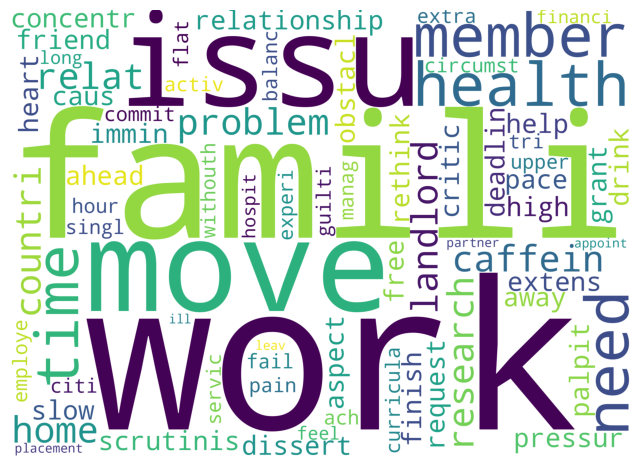


Wordcloud for topic: 1 



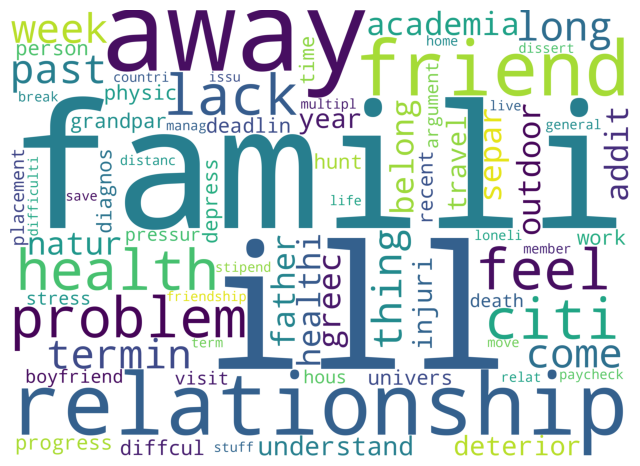


Wordcloud for topic: 2 



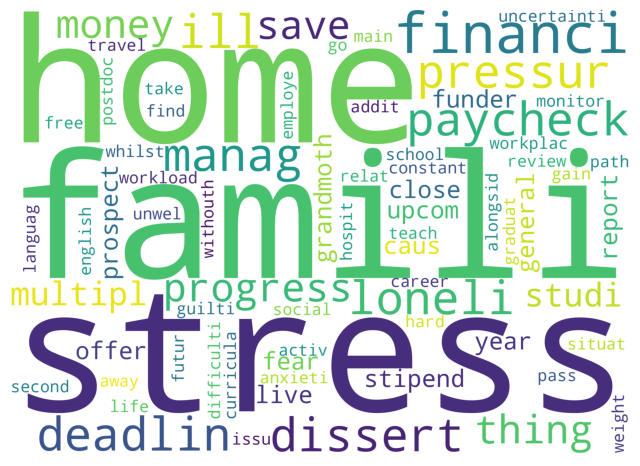


Wordcloud for topic: 3 



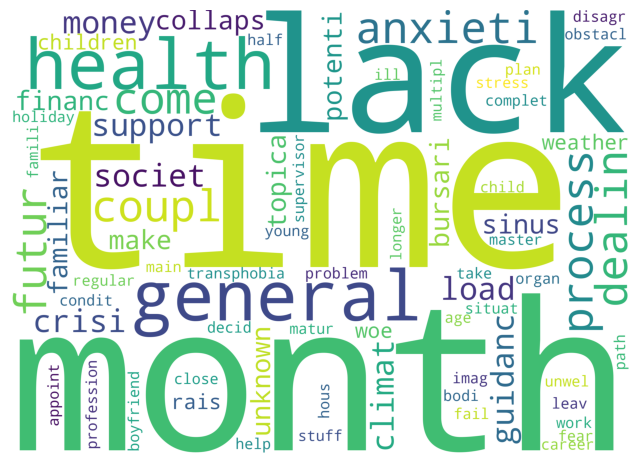


Wordcloud for topic: 4 



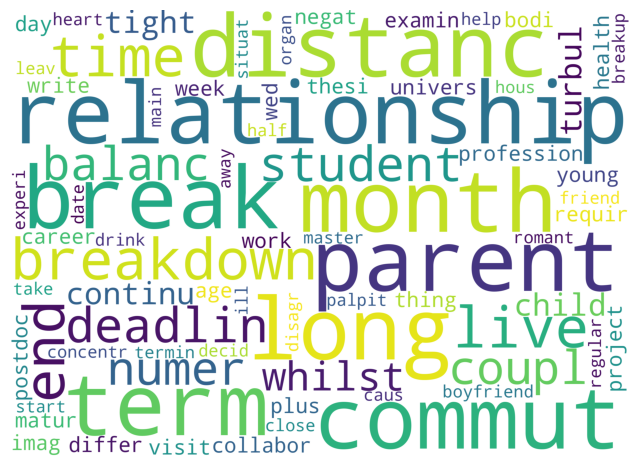


Wordcloud for topic: 5 



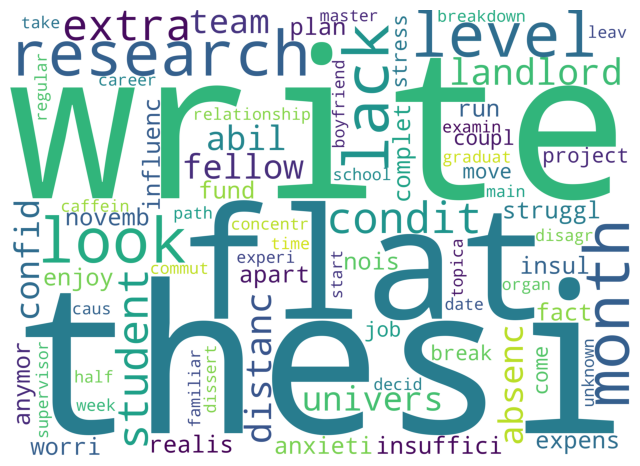


Wordcloud for topic: 6 



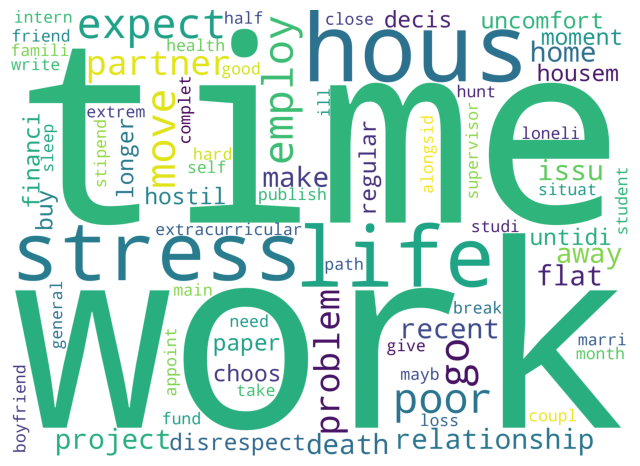


Wordcloud for topic: 7 



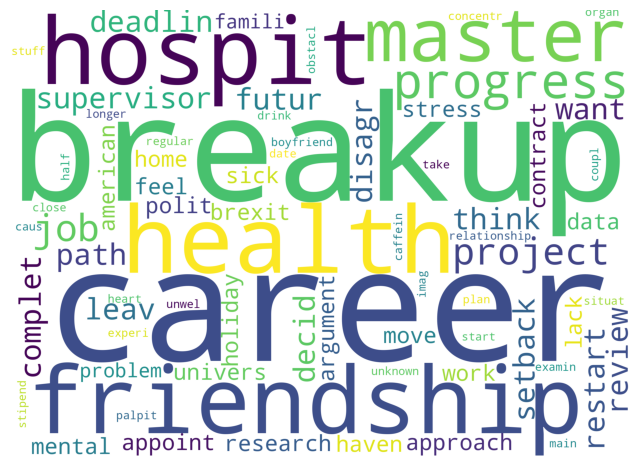


Wordcloud for topic: 8 



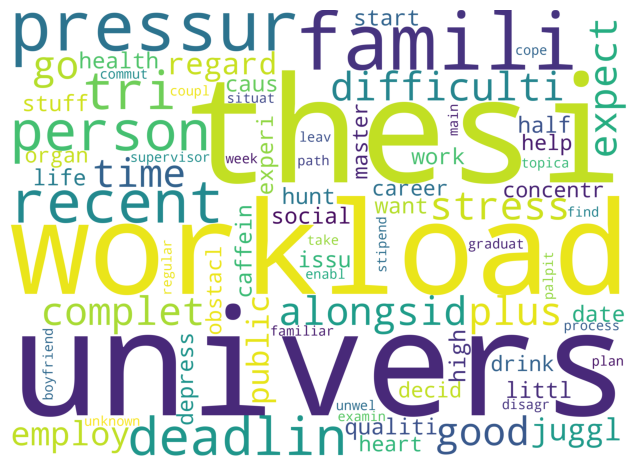


Wordcloud for topic: 9 



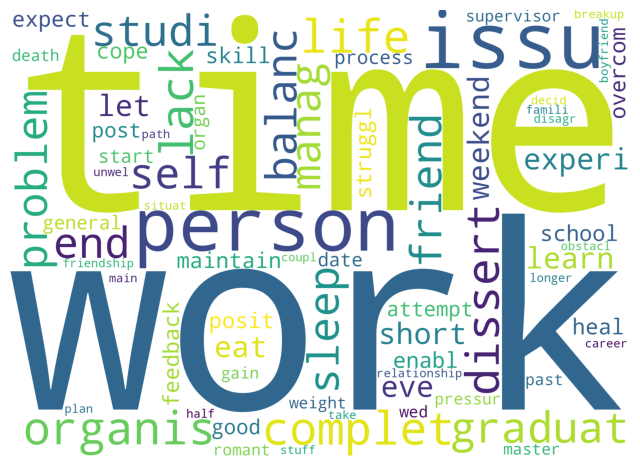

In [ ]:
for topic in range(10):
    #plt.figure(figsize=(10,15))
    word_cloud(topic, lda_model)


Wordcloud for topic: 0 



<Figure size 1000x1500 with 0 Axes>

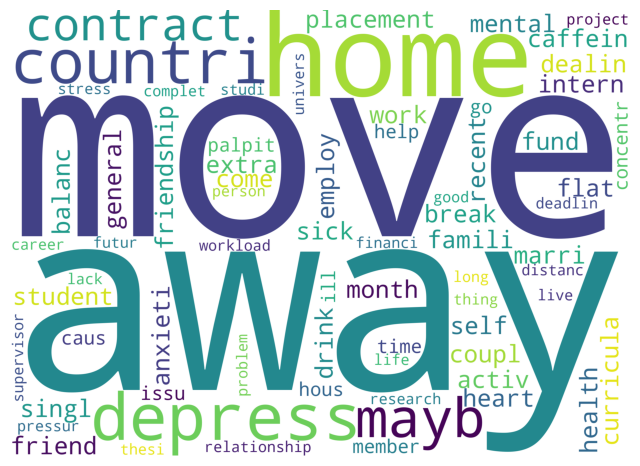


Wordcloud for topic: 1 



<Figure size 1000x1500 with 0 Axes>

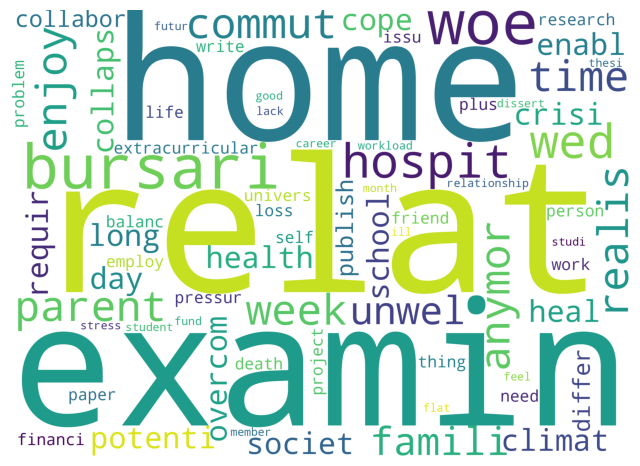


Wordcloud for topic: 2 



<Figure size 1000x1500 with 0 Axes>

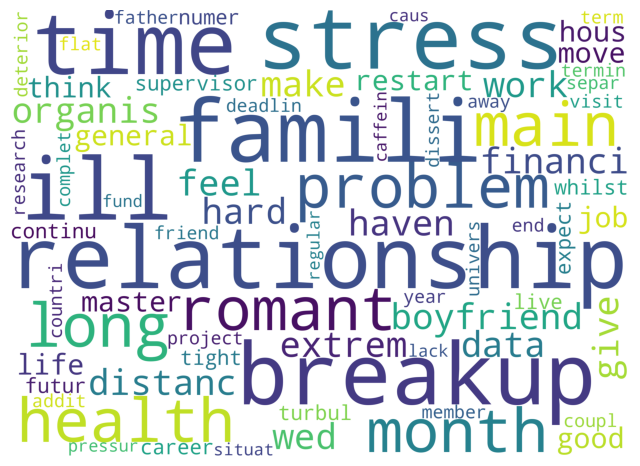


Wordcloud for topic: 3 



<Figure size 1000x1500 with 0 Axes>

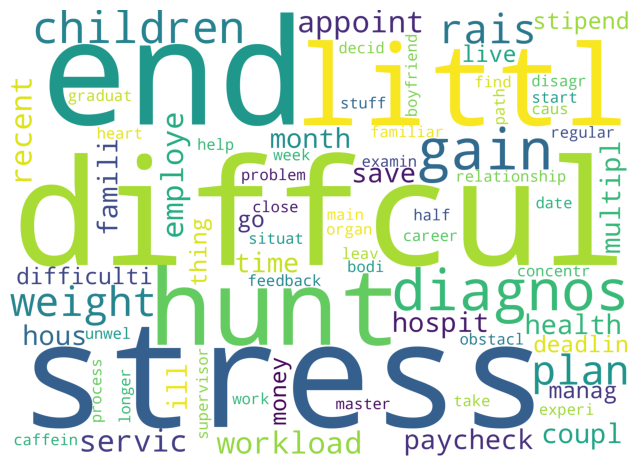


Wordcloud for topic: 4 



<Figure size 1000x1500 with 0 Axes>

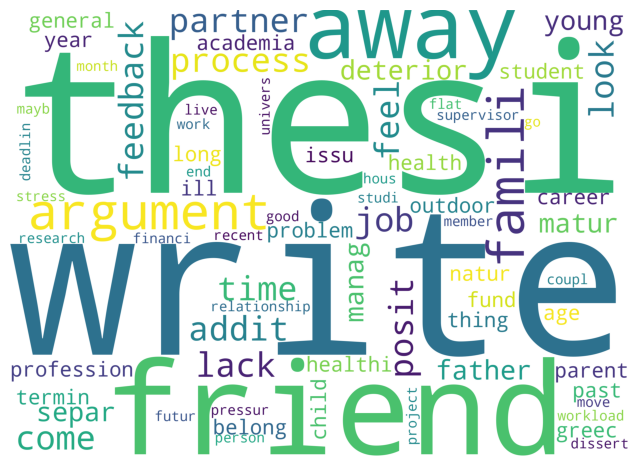


Wordcloud for topic: 5 



<Figure size 1000x1500 with 0 Axes>

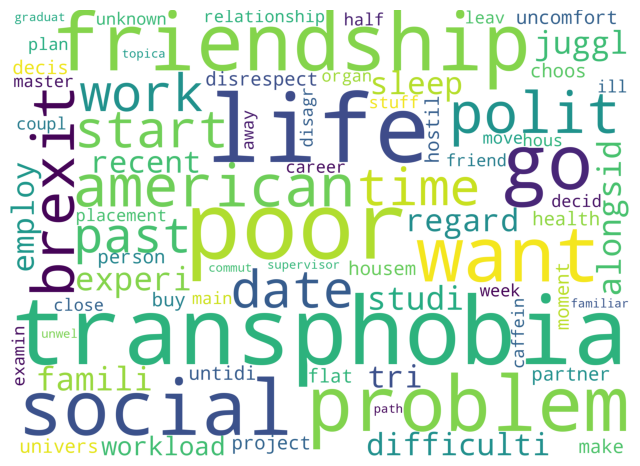


Wordcloud for topic: 6 



<Figure size 1000x1500 with 0 Axes>

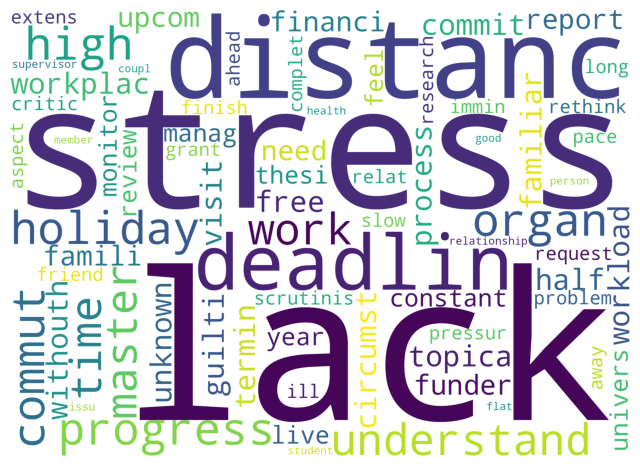


Wordcloud for topic: 7 



<Figure size 1000x1500 with 0 Axes>

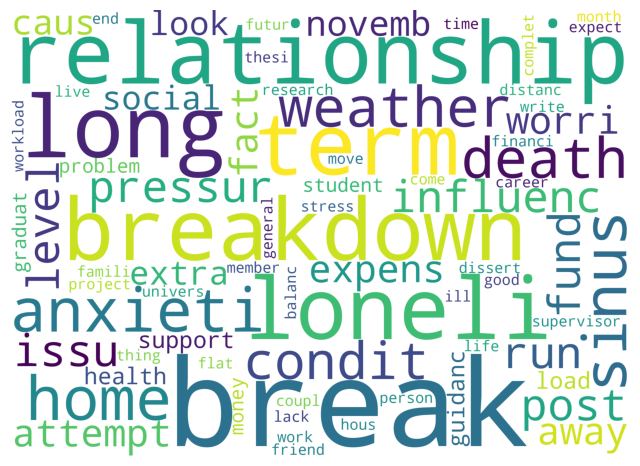


Wordcloud for topic: 8 



<Figure size 1000x1500 with 0 Axes>

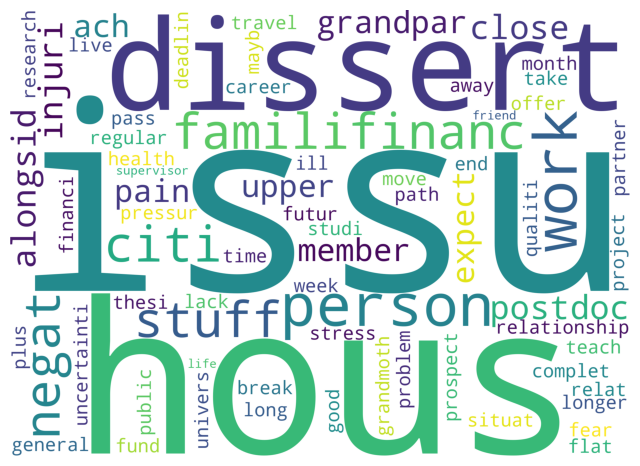


Wordcloud for topic: 9 



<Figure size 1000x1500 with 0 Axes>

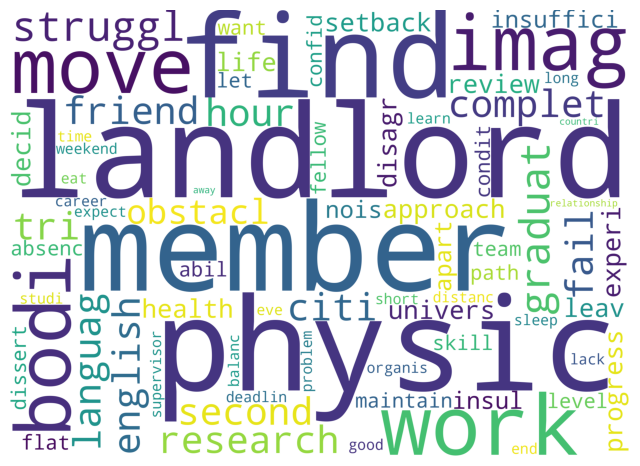

In [ ]:
for topic in range(10):
    plt.figure(figsize=(10,15))
    word_cloud(topic, lda_model_tfidf)

In [ ]:
# Read the first dataset
df = pd.read_excel('dataset.xlsx')

# Read the second dataset
depression_df = pd.read_excel('depression_dataset_reddit_cleaned.xlsx')

# Remove the first row of the second DataFrame
depression_df = depression_df.drop(index=0)

# Combine the two DataFrames
df = pd.concat([df, depression_df], ignore_index=True)
df.columns

Index(['text', 'label'], dtype='object')

In [ ]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 30.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=f3e13bb18796a4133054fabe57e57d4a1492abd2bdb8c4c06b53a5493d97d732
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
import pandas as pd
from langdetect import detect, DetectorFactory

# To make the language detection consistent
DetectorFactory.seed = 0
def is_english(word):
    try:
        return detect(word) == 'en'
    except:
        return False

df = df[df['text'].apply(is_english)]

In [ ]:
df

text  label
1      trouble sleeping, confused mind, restless hear...    1.0
2      All wrong, back off dear, forward doubt. Stay ...    1.0
3      I've shifted my focus to something else but I'...    1.0
4      I'm restless and restless, it's been a month n...    1.0
5      every break, you must be nervous, like somethi...    1.0
...                                                  ...    ...
14707                                       is that snow    0.0
14708                 moulin rouge mad me cry once again    0.0
14709  trying to shout but can t find people on the list    0.0
14710  ughh can t find my red sox hat got ta wear thi...    0.0
14711  slept wonderfully finally tried swatching for ...    0.0

[12605 rows x 2 columns]

In [ ]:
# Define the topics and their keywords
topics_data = {
    "Assigned Theme": [
        "Transition and Change",
        "Academic Challenges",
        "Relationships and Emotional Well-being",
        "Family Challenges",
        "Writing and Communication",
        "Social Issues",
        "Financial and Housing Struggles",
        "Post-Graduation Struggles"
    ],
    "Keywords": [
        ["move", "away", "home", "contract", "placement"],
        ["exam", "deadline", "bursary", "stress", "parental pressure"],
        ["relationship", "breakup", "loneliness", "anxiety", "family", "stress"],
        ["children", "difficult", "stress", "health", "family dynamics"],
        ["write", "thesis", "argument", "communication", "clarity"],
        ["transphobia", "friendship", "social issues", "community", "support"],
        ["finance", "landlord", "housing", "budget", "financial stress"],
        ["graduate", "struggle", "work", "career", "transition"]
    ]
}

In [ ]:
# Create a DataFrame for topics
df_topics = pd.DataFrame(topics_data)

In [ ]:
pip install pandas scikit-learn

In [ ]:
pip install tf-keras

In [ ]:
pip install sentence-transformers

In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util
from tqdm import tqdm  # For progress tracking

# Load the BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Preprocess the "Keywords" column (combine keywords into a single string per theme)
df_topics['Keywords'] = df_topics['Keywords'].apply(lambda x: ' '.join(x))

# Generate embeddings for the theme keywords
theme_embeddings = model.encode(df_topics['Keywords'].tolist(), convert_to_tensor=True)

# Define a function to clean text
def preprocess_text(text):
    if pd.isna(text):
        return None
    return ' '.join(text.lower().split())  # Lowercase and remove extra spaces

# Define a function to assign themes to a batch of text
def assign_themes_batch(texts, theme_embeddings, threshold=0.2):
    # Preprocess and filter out empty texts
    preprocessed_texts = [preprocess_text(text) for text in texts]
    valid_texts = [text for text in preprocessed_texts if text is not None]

    # Encode all valid texts in batch
    text_embeddings = model.encode(valid_texts, convert_to_tensor=True)

    # Compute cosine similarities between text embeddings and theme embeddings
    similarity_matrix = util.cos_sim(text_embeddings, theme_embeddings)

    # Assign themes based on the highest similarity score
    assigned_themes = []
    for idx, text in enumerate(preprocessed_texts):
        if text is None:
            assigned_themes.append("Unassigned")
            continue

        # Get similarity scores for the current text
        cosine_similarities = similarity_matrix[idx]

        # Assign theme if the highest similarity exceeds the threshold
        if cosine_similarities.max() < threshold:
            assigned_themes.append("Unassigned")
        else:
            highest_index = cosine_similarities.argmax().item()
            assigned_themes.append(df_topics['Assigned Theme'].iloc[highest_index])

    return assigned_themes

# Process the dataframe in chunks
chunk_size = 200  # Adjust chunk size based on available memory
assigned_themes = []

for start in tqdm(range(0, len(df), chunk_size), desc="Processing chunks"):
    end = start + chunk_size
    text_chunk = df['text'].iloc[start:end]
    chunk_results = assign_themes_batch(text_chunk, theme_embeddings)
    assigned_themes.extend(chunk_results)

# Add the assigned themes to the dataframe
df['Assigned Theme'] = assigned_themes

# Print results
print(df[['text', 'Assigned Theme']])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Processing chunks: 100%|██████████| 64/64 [00:15<00:00,  4.06it/s]

                                                    text  \
1      trouble sleeping, confused mind, restless hear...   
2      All wrong, back off dear, forward doubt. Stay ...   
3      I've shifted my focus to something else but I'...   
4      I'm restless and restless, it's been a month n...   
5      every break, you must be nervous, like somethi...   
...                                                  ...   
14707                                       is that snow   
14708                 moulin rouge mad me cry once again   
14709  trying to shout but can t find people on the list   
14710  ughh can t find my red sox hat got ta wear thi...   
14711  slept wonderfully finally tried swatching for ...   

                               Assigned Theme  
1      Relationships and Emotional Well-being  
2                                  Unassigned  
3                   Post-Graduation Struggles  
4                                  Unassigned  
5      Relationships and Emotional Well

In [ ]:
unassigned_count = df['Assigned Theme'].value_counts().get("Unassigned", 0)
print(f"Number of unassigned themes: {unassigned_count}")

Number of unassigned themes: 7977


In [ ]:
# Save the new dataset to a xls file
df.to_csv('dataset_with_themes.csv', index=False)

In [ ]:
themed_data = pd.read_csv('dataset_with_themes.csv')

In [ ]:
unassigned_df = themed_data[themed_data['Assigned Theme'] == 'Unassigned'].copy()
assigned_df = themed_data[themed_data['Assigned Theme'] != 'Unassigned'].copy()

# Check the resulting datasets
print("Unassigned DataFrame:")
print(unassigned_df)

print("\nAssigned DataFrame:")
print(assigned_df)

Unassigned DataFrame:
                                                    text  label Assigned Theme
1      All wrong, back off dear, forward doubt. Stay ...    1.0     Unassigned
3      I'm restless and restless, it's been a month n...    1.0     Unassigned
7      I haven't slept well for 2 days, it's like I'm...    1.0     Unassigned
9      always restless every night, even though I don...    1.0     Unassigned
10     I'm confused, I'm not feeling good lately. Eve...    1.0     Unassigned
...                                                  ...    ...            ...
12600                                       is that snow    0.0     Unassigned
12601                 moulin rouge mad me cry once again    0.0     Unassigned
12602  trying to shout but can t find people on the list    0.0     Unassigned
12603  ughh can t find my red sox hat got ta wear thi...    0.0     Unassigned
12604  slept wonderfully finally tried swatching for ...    0.0     Unassigned

[7977 rows x 3 columns]

Assi

In [ ]:
# Save each DataFrame to separate CSV files
unassigned_df.to_csv('unassigned_dataset.csv', index=False)
assigned_df.to_csv('assigned_dataset.csv', index=False)

In [ ]:
unassigned_df.head

<bound method NDFrame.head of                                                     text  label Assigned Theme
1      All wrong, back off dear, forward doubt. Stay ...    1.0     Unassigned
3      I'm restless and restless, it's been a month n...    1.0     Unassigned
7      I haven't slept well for 2 days, it's like I'm...    1.0     Unassigned
9      always restless every night, even though I don...    1.0     Unassigned
10     I'm confused, I'm not feeling good lately. Eve...    1.0     Unassigned
...                                                  ...    ...            ...
12600                                       is that snow    0.0     Unassigned
12601                 moulin rouge mad me cry once again    0.0     Unassigned
12602  trying to shout but can t find people on the list    0.0     Unassigned
12603  ughh can t find my red sox hat got ta wear thi...    0.0     Unassigned
12604  slept wonderfully finally tried swatching for ...    0.0     Unassigned

[7977 rows x 3 columns]>

In [ ]:
!pip install simpletransformers pandas scikit-learn torch transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.7 MB/s eta 0:00:00
   

In [ ]:
unassigned_df['label'].value_counts()

label
0.0    6812
1.0    1165
Name: count, dtype: int64

In [ ]:
unassigned_df.isnull().sum()

text              0
label             0
Assigned Theme    0
dtype: int64

In [ ]:
unassigned_df.shape

(7977, 3)

In [ ]:
unassigned_df_n = unassigned_df.sample(frac=1)
unassigned_df_n.head()

text  label Assigned Theme
12159  argh finally figured out whats killing inquizi...    0.0     Unassigned
4261   Hadoohh, this clock can be sped up to 4 in the...    0.0     Unassigned
12190  markhardy 9 it is but i m still waiting for my...    0.0     Unassigned
9475   the angel is going to miss the athlete this we...    0.0     Unassigned
2064   Wanzar and hijabistahub clothes brackets all sold    0.0     Unassigned

In [ ]:
import string
import nltk

def text_transformation(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    stopword = stopwords.words('english')
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopword]
    lemma_words=[lemmatizer.lemmatize(w) for w in filtered_words]
    return " ".join(filtered_words)

In [ ]:
unassigned_df_n['cleaned'] = unassigned_df['text'].apply(text_transformation)

In [ ]:
unassigned_df_n

text  label  \
12159  argh finally figured out whats killing inquizi...    0.0   
4261   Hadoohh, this clock can be sped up to 4 in the...    0.0   
12190  markhardy 9 it is but i m still waiting for my...    0.0   
9475   the angel is going to miss the athlete this we...    0.0   
2064   Wanzar and hijabistahub clothes brackets all sold    0.0   
...                                                  ...    ...   
1579                                yongi has green hair    0.0   
2881                Have you started your holiday today?    0.0   
9905   damnit i wa really digging this season of reap...    0.0   
594              Don't worry, karma is there, hauuuhzzzz    1.0   
9120   stark you don t follow me either and i work fo...    0.0   

      Assigned Theme                                            cleaned  
12159     Unassigned  argh finally figured out whats killing inquizi...  
4261      Unassigned  hadoohh  this clock can be sped up to  in the ...  
12190     Unassigned  markhardy  it is but i m still waiting for my ...  
9475      Unassigned  the angel is going to miss the athlete this we...  
2064      Unassigned  wanzar and hijabistahub clothes brackets all sold  
...              ...                                                ...  
1579      Unassigned                               yongi has green hair  
2881      Unassigned               have you started your holiday today   
9905      Unassigned  damnit i wa really digging this season of reap...  
594       Unassigned            don t worry  karma is there  hauuuhzzzz  
9120      Unassigned  stark you don t follow me either and i work fo...  

[7977 rows x 4 columns]

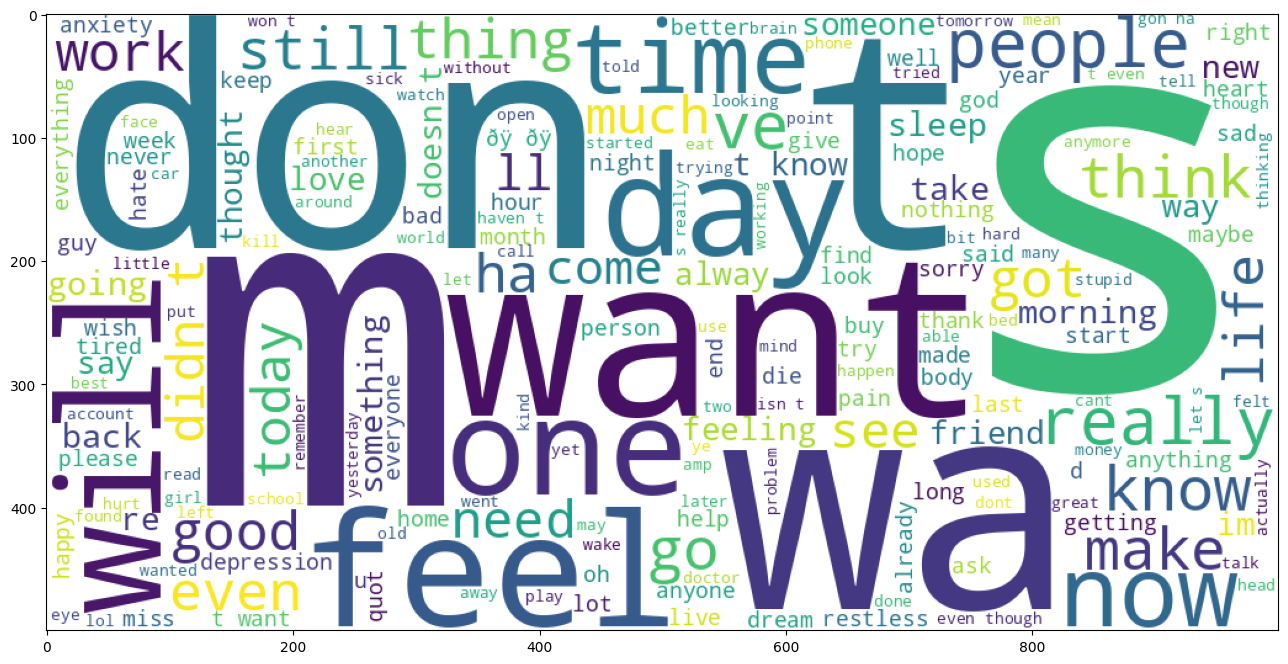

In [ ]:
from wordcloud import WordCloud
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in unassigned_df_n['cleaned']:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 6).generate(word_cloud)
plt.imshow(wordcloud)

In [ ]:
%%time
max_words = 10000

from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = max_words, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n-',
                      split=' ', char_level=False, oov_token=None, document_count=0)

tokenizer.fit_on_texts(unassigned_df_n['cleaned'])

CPU times: user 250 ms, sys: 7.1 ms, total: 257 ms
Wall time: 274 ms


In [ ]:
%%time
word_counts = tokenizer.word_counts
word_docs = tokenizer.word_docs
word_index = tokenizer.word_index
document_count = tokenizer.document_count

print(len(word_counts))

15453
CPU times: user 68 µs, sys: 2 µs, total: 70 µs
Wall time: 73.4 µs


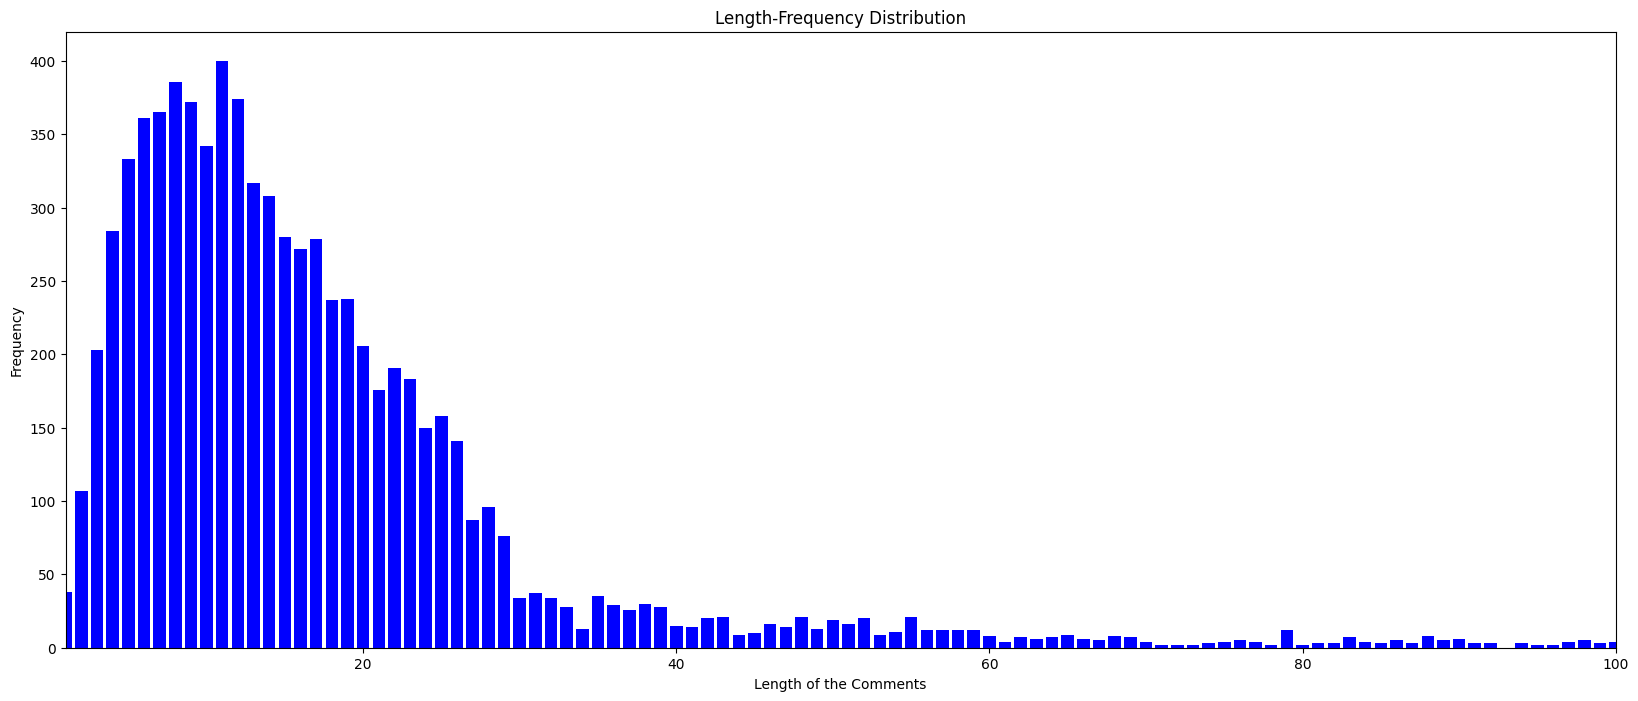

Maximum Length of a Comment: 1282
Minimum Length of a Comment: 0
Average Length of a Comment: 24.0


In [ ]:
unassigned_df_n['Comment_Length'] = unassigned_df_n.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in unassigned_df_n.Comment_Length:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 100)
# in this notbook color is not working but it should work.
plt.xlabel('Length of the Comments')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()
print(f"Maximum Length of a Comment: {max(unassigned_df_n.Comment_Length)}")
print(f"Minimum Length of a Comment: {min(unassigned_df_n.Comment_Length)}")
print(f"Average Length of a Comment: {round(np.mean(unassigned_df_n.Comment_Length),0)}")

In [ ]:
sequences = tokenizer.texts_to_sequences(unassigned_df_n['cleaned'])

In [ ]:
# Check the DataFrame structure
print("Shape of unassigned_df_n:", unassigned_df_n.shape)
print("Columns in unassigned_df_n:", unassigned_df_n.columns)
print("First few rows of unassigned_df_n:")
print(unassigned_df_n.head())

# Check for the 'cleaned' column
if 'cleaned' in unassigned_df_n.columns:
    if not unassigned_df_n.empty:
        print("First cleaned value:", unassigned_df_n['cleaned'].iloc[0])
    else:
        print("unassigned_df_n is empty.")
else:
    print("'cleaned' column does not exist in unassigned_df_n.")

# Check the sequences
print("Length of sequences:", len(sequences))
if len(sequences) > 0:
    print("First sequence:", sequences[0])
else:
    print("sequences is empty.")

# Tokenizer word index
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Shape of unassigned_df_n: (7977, 5)
Columns in unassigned_df_n: Index(['text', 'label', 'Assigned Theme', 'cleaned', 'Comment_Length'], dtype='object')
First few rows of unassigned_df_n:
                                                    text  label  \
12159  argh finally figured out whats killing inquizi...    0.0   
4261   Hadoohh, this clock can be sped up to 4 in the...    0.0   
12190  markhardy 9 it is but i m still waiting for my...    0.0   
9475   the angel is going to miss the athlete this we...    0.0   
2064   Wanzar and hijabistahub clothes brackets all sold    0.0   

      Assigned Theme                                            cleaned  \
12159     Unassigned  argh finally figured out whats killing inquizi...   
4261      Unassigned  hadoohh  this clock can be sped up to  in the ...   
12190     Unassigned  markhardy  it is but i m still waiting for my ...   
9475      Unassigned  the angel is going to miss the athlete this we...   
2064      Unassigned  wanzar and hi

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:

%%time
## Before padding length of different training examples
mx = len(sequences[0])
for x in sequences:
  mx =max(mx, len(x))
print("Maximum Review length",mx)

##We can also determine maxlen by plotting the frequency distribution of the lengths
corpus = keras.preprocessing.sequence.pad_sequences(sequences, value=0.0, padding='post', maxlen= 60)
## We get the maxlen value from the Length frequency distribution

print(corpus[1])

Maximum Review length 1243
[6415   19  566   26   24 6416   37    2   14    3  609  672 3401   26
    9  256 6417    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0]
CPU times: user 42.1 ms, sys: 20 µs, total: 42.1 ms
Wall time: 87.2 ms


In [ ]:
# Ensure the index is reset to default for unassigned_df_n
unassigned_df_n = unassigned_df_n.reset_index(drop=True)

# Loop through the first two rows
for i in range(2):
    # Access the 'cleaned' column (ensure index is reset)
    print(unassigned_df_n['cleaned'][i])

    # Access 'corpus' correctly based on its type
    if isinstance(corpus, pd.DataFrame):
        print("\n", corpus.iloc[i])  # Use .iloc for DataFrame positional indexing
    else:
        print("\n", corpus[i])  # For Numpy arrays

argh finally figured out whats killing inquizitor game on jailbroken device about  star review too late though fix on the way

 [1040  274 1939   48 1940  880 6413  407   25 6414 3400   44 1150 1089
   72  389  123  952   25    3  135    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0]
hadoohh  this clock can be sped up to  in the afternoon bro wkwkwkwkwk can t wait aaaaaaaa

 [6415   19  566   26   24 6416   37    2   14    3  609  672 3401   26
    9  256 6417    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0]


## Tokenization with roBERTa

In [ ]:
from transformers import DistilBertTokenizer
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

In [ ]:
# Load dataset from a DataFrame
corpus = unassigned_df_n['text'].values  # Array of text data
labels = unassigned_df_n['label'].values  # Array of labels (0 or 1)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(corpus, labels, test_size=0.2, random_state=0)

print("Training Size: ", len(X_train))
print("Test Size: ", len(X_test))
print("Class distribution in training set:", pd.Series(y_train).value_counts())

Training Size:  6381
Test Size:  1596
Class distribution in training set: 0.0    5456
1.0     925
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Handle class imbalance using RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train.reshape(-1, 1), y_train)

# Flatten the text data back to 1D array
X_train_resampled = X_train_resampled.ravel()

print("Class distribution after oversampling:", pd.Series(y_train_resampled).value_counts())

Class distribution after oversampling: 0.0    5456
1.0    5456
Name: count, dtype: int64


In [ ]:
# Load the tokenizer for DistilBERT
from transformers import DistilBertTokenizer

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Tokenization function
def tokenize_function(texts):
    return tokenizer(list(texts), padding='max_length', truncation=True, max_length=128, return_tensors="pt")

# Tokenize the resampled training data and test data
train_encodings = tokenize_function(X_train_resampled)
test_encodings = tokenize_function(X_test)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [ ]:
# Convert labels to tensors and one-hot encode
num_labels = 2  # Binary classification
y_train_resampled = torch.tensor(y_train_resampled).long()
y_test = torch.tensor(y_test).long()

# One-hot encoding
y_train_one_hot = F.one_hot(y_train_resampled, num_classes=num_labels).float()
y_test_one_hot = F.one_hot(y_test, num_classes=num_labels).float()

print("Shape of y_train_one_hot:", y_train_one_hot.shape)
print("Shape of y_test_one_hot:", y_test_one_hot.shape)

Shape of y_train_one_hot: torch.Size([10912, 2])
Shape of y_test_one_hot: torch.Size([1596, 2])


## Create PyTorch Datasets

In [ ]:
class DepressionDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

# Create PyTorch datasets
train_dataset = DepressionDataset(train_encodings, y_train_one_hot)
test_dataset = DepressionDataset(test_encodings, y_test_one_hot)

# Verify dataset sizes
print("Train dataset size:", len(train_dataset))
print("Test dataset size:", len(test_dataset))

Train dataset size: 10912
Test dataset size: 1596


## Load DistilBERT model for sequence classification

In [ ]:
from transformers import DistilBertForSequenceClassification

# Load the pre-trained DistilBERT model with a classification head
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
pip install transformers[torch]

In [ ]:
pip install accelerate>=0.26.0

In [ ]:
print(f"Number of samples in encodings: {len(train_encodings['input_ids'])}")
print(f"Number of samples in labels: {len(y_train_one_hot)}")  # Ensure this is the correct labels variable

Number of samples in encodings: 10912
Number of samples in labels: 10912


In [ ]:
print(model.device)


cpu


<ipython-input-91-0c2c431dc979>:33: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
  0%|          | 0/3410 [00:00<?, ?it/s]<ipython-input-91-0c2c431dc979>:75: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():



Epoch 1/10


 10%|█         | 341/3410 [00:30<04:32, 11.26it/s]<ipython-input-91-0c2c431dc979>:118: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


  Training Loss: 0.6714
  Training F1-Score: 0.5136
  Validation Loss: 0.6728
  Validation F1-Score: 0.7065

Epoch 2/10


<ipython-input-91-0c2c431dc979>:75: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
 20%|██        | 682/3410 [01:04<04:06, 11.07it/s]<ipython-input-91-0c2c431dc979>:118: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


  Training Loss: 0.5717
  Training F1-Score: 0.7513
  Validation Loss: 0.5504
  Validation F1-Score: 0.8845


<ipython-input-91-0c2c431dc979>:75: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
 20%|██        | 684/3410 [01:07<18:43,  2.43it/s]


Epoch 3/10


 30%|██▉       | 1022/3410 [01:36<03:40, 10.82it/s]<ipython-input-91-0c2c431dc979>:118: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


  Training Loss: 0.4955
  Training F1-Score: 0.7874
  Validation Loss: 0.4995
  Validation F1-Score: 0.8749


<ipython-input-91-0c2c431dc979>:75: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
 30%|███       | 1026/3410 [01:39<11:52,  3.34it/s]


Epoch 4/10


 40%|████      | 1364/3410 [02:08<02:59, 11.43it/s]<ipython-input-91-0c2c431dc979>:118: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


  Training Loss: 0.4405
  Training F1-Score: 0.8245
  Validation Loss: 0.4317
  Validation F1-Score: 0.8954


<ipython-input-91-0c2c431dc979>:75: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
 40%|████      | 1366/3410 [02:10<14:09,  2.41it/s]


Epoch 5/10


 50%|████▉     | 1704/3410 [02:40<02:40, 10.64it/s]<ipython-input-91-0c2c431dc979>:118: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


  Training Loss: 0.3651
  Training F1-Score: 0.8682
  Validation Loss: 0.3162
  Validation F1-Score: 0.9358


<ipython-input-91-0c2c431dc979>:75: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
 50%|█████     | 1708/3410 [02:42<08:38,  3.28it/s]


Epoch 6/10


 60%|██████    | 2046/3410 [03:12<02:01, 11.25it/s]<ipython-input-91-0c2c431dc979>:118: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


  Training Loss: 0.2709
  Training F1-Score: 0.9185
  Validation Loss: 0.2489
  Validation F1-Score: 0.9406


<ipython-input-91-0c2c431dc979>:75: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
 60%|██████    | 2048/3410 [03:14<09:20,  2.43it/s]


Epoch 7/10


 70%|██████▉   | 2386/3410 [03:44<01:34, 10.87it/s]<ipython-input-91-0c2c431dc979>:118: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


  Training Loss: 0.1915
  Training F1-Score: 0.9502
  Validation Loss: 0.1850
  Validation F1-Score: 0.9535


<ipython-input-91-0c2c431dc979>:75: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
 70%|███████   | 2390/3410 [03:46<05:01,  3.38it/s]


Epoch 8/10


 80%|████████  | 2728/3410 [04:16<00:59, 11.38it/s]<ipython-input-91-0c2c431dc979>:118: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


  Training Loss: 0.1405
  Training F1-Score: 0.9650
  Validation Loss: 0.1415
  Validation F1-Score: 0.9641


<ipython-input-91-0c2c431dc979>:75: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
 80%|████████  | 2730/3410 [04:18<04:58,  2.28it/s]


Epoch 9/10


 90%|████████▉ | 3068/3410 [04:48<00:31, 10.81it/s]<ipython-input-91-0c2c431dc979>:118: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


  Training Loss: 0.1064
  Training F1-Score: 0.9720
  Validation Loss: 0.1141
  Validation F1-Score: 0.9702


<ipython-input-91-0c2c431dc979>:75: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
 90%|█████████ | 3072/3410 [04:50<01:40,  3.36it/s]


Epoch 10/10


100%|██████████| 3410/3410 [05:19<00:00, 11.26it/s]<ipython-input-91-0c2c431dc979>:118: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


  Training Loss: 0.0845
  Training F1-Score: 0.9774
  Validation Loss: 0.1141
  Validation F1-Score: 0.9722
  Early stopping counter: 1/3
Test Accuracy: 0.9724
Test F1-Score: 0.9722


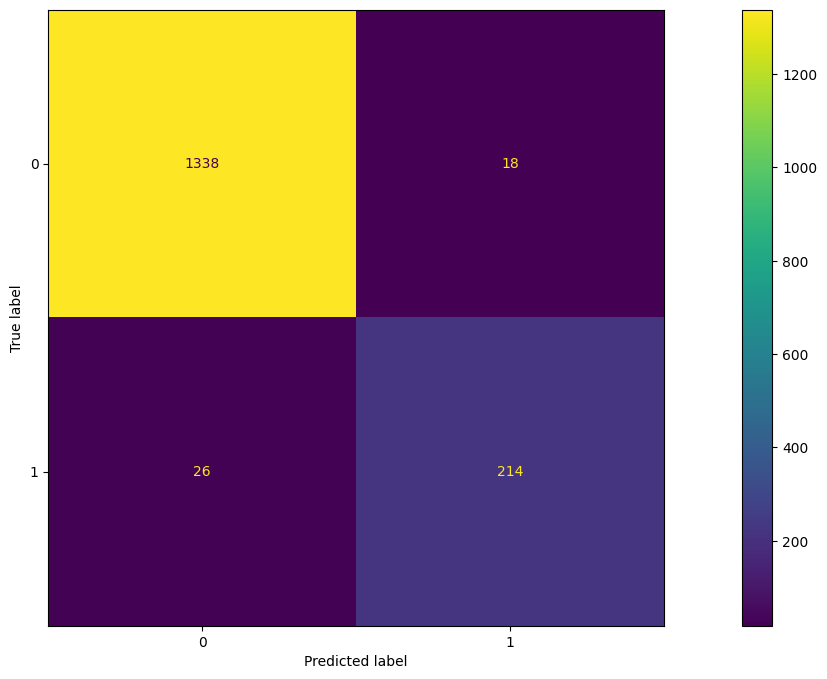

100%|██████████| 3410/3410 [05:31<00:00, 11.26it/s]

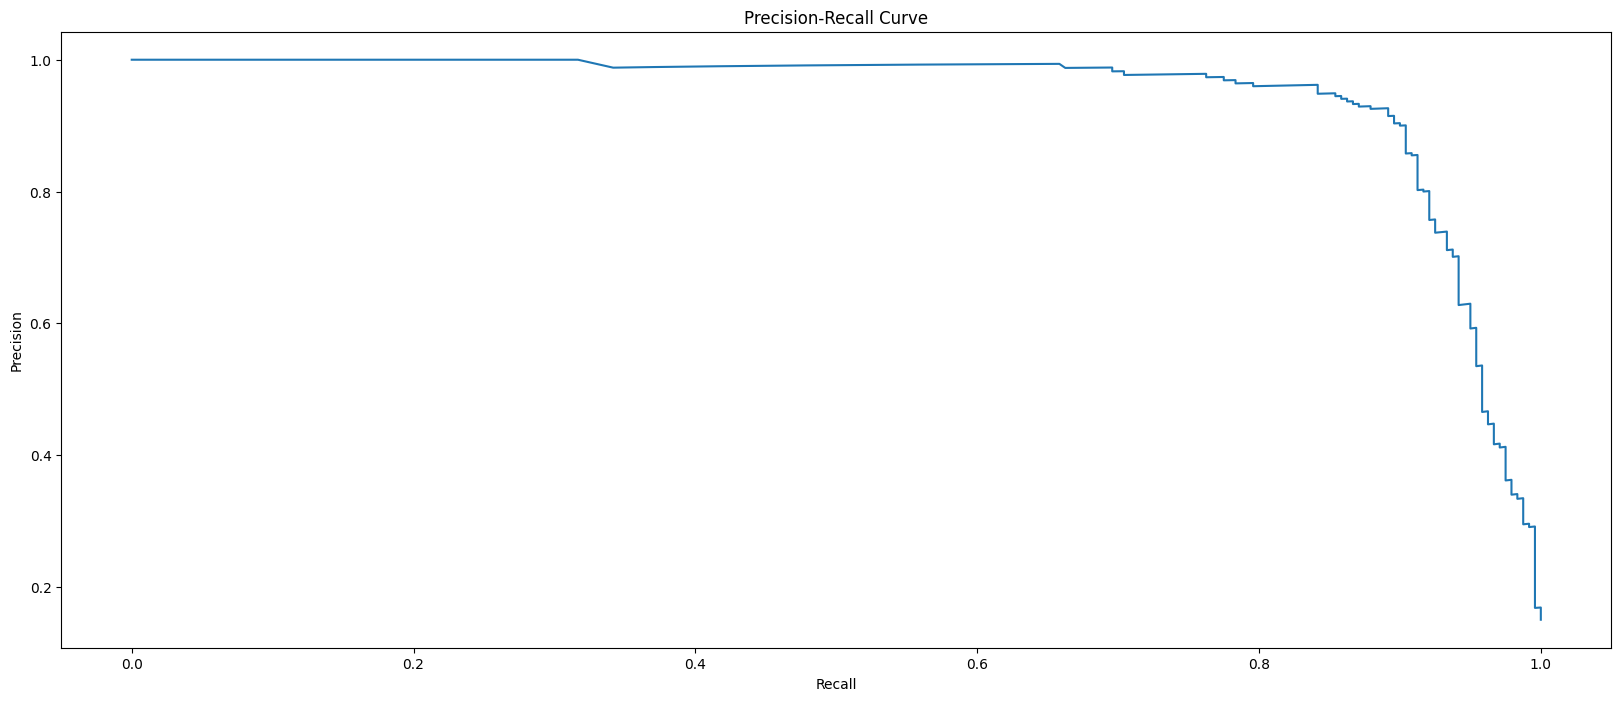

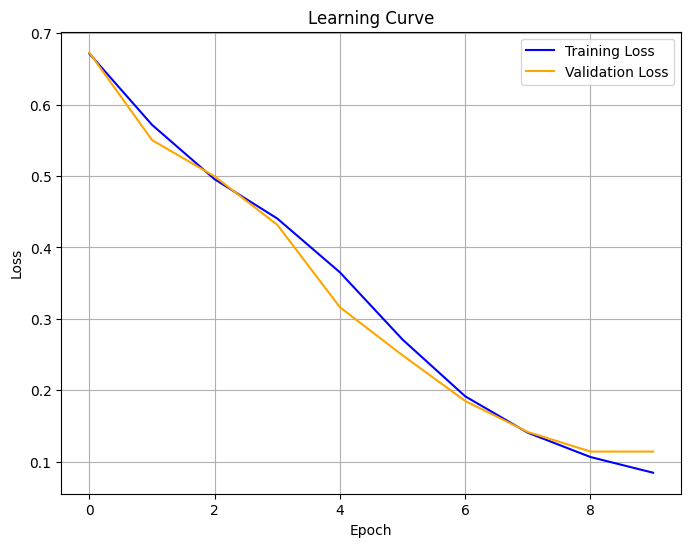

In [ ]:
from torch.optim import AdamW
from torch.cuda.amp import GradScaler, autocast
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
from tqdm import tqdm
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_recall_curve
)
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Check if GPU is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Assuming model and tokenizer are already loaded
model = model.to(device)  # Ensure model is on the correct device

# Training parameters
batch_size = 32
epochs = 10
learning_rate = 1e-5  # Decrease learning rate
accumulation_steps = 4
patience = 3
weight_decay = 0.1  # Increase weight decay
max_grad_norm = 1.0
scaler = GradScaler()

# TensorBoard logger
writer = SummaryWriter()

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Compute class weights for imbalanced datasets
labels = np.concatenate([batch['labels'].cpu().numpy().flatten() for batch in train_loader])
class_weights = compute_class_weight('balanced', classes=np.unique(labels), y=labels)
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

# Define loss function with class weights
loss_fn = torch.nn.CrossEntropyLoss(weight=class_weights)

# Optimizer with weight decay
optimizer = AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.2, patience=2, verbose=True)

# Early stopping variables
train_losses = []
val_losses = []
best_val_loss = np.inf  # Track the best validation loss
early_stopping_counter = 0

# Training loop
progress_bar = tqdm(range(epochs * len(train_loader)))
model.train()

for epoch in range(epochs):
    print(f"\nEpoch {epoch + 1}/{epochs}")
    epoch_train_loss = 0
    epoch_train_preds = []
    epoch_train_labels = []

    for step, batch in enumerate(train_loader):
        batch = {key: val.to(device) for key, val in batch.items()}

        with autocast():
            outputs = model(**batch)
            loss = outputs.loss

        scaler.scale(loss).backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)

        if (step + 1) % accumulation_steps == 0:
            scaler.step(optimizer)
            scaler.update()
            optimizer.zero_grad()

        progress_bar.update(1)
        epoch_train_loss += loss.item()

        logits = outputs.logits
        predictions = torch.argmax(logits, dim=-1)
        epoch_train_labels.extend(torch.argmax(batch['labels'], dim=-1).cpu().numpy())
        epoch_train_preds.extend(predictions.cpu().numpy())

    avg_train_loss = epoch_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    train_accuracy = accuracy_score(epoch_train_labels, epoch_train_preds)
    train_f1 = f1_score(epoch_train_labels, epoch_train_preds, average='weighted')

    writer.add_scalar("Loss/train", avg_train_loss, epoch)
    writer.add_scalar("Accuracy/train", train_accuracy, epoch)
    writer.add_scalar("F1/train", train_f1, epoch)

    print(f"  Training Loss: {avg_train_loss:.4f}")
    print(f"  Training F1-Score: {train_f1:.4f}")

    # Validation loop
    model.eval()
    epoch_val_loss = 0
    epoch_val_preds = []
    epoch_val_labels = []

    with torch.no_grad():
        for batch in test_loader:
            batch = {key: val.to(device) for key, val in batch.items()}

            with autocast():
                outputs = model(**batch)
                loss = outputs.loss

            logits = outputs.logits
            predictions = torch.argmax(logits, dim=-1)
            epoch_val_labels.extend(torch.argmax(batch['labels'], dim=-1).cpu().numpy())
            epoch_val_preds.extend(predictions.cpu().numpy())
            epoch_val_loss += loss.item()

    avg_val_loss = epoch_val_loss / len(test_loader)
    val_losses.append(avg_val_loss)

    val_accuracy = accuracy_score(epoch_val_labels, epoch_val_preds)
    val_f1 = f1_score(epoch_val_labels, epoch_val_preds, average='weighted')

    writer.add_scalar("Loss/val", avg_val_loss, epoch)
    writer.add_scalar("Accuracy/val", val_accuracy, epoch)
    writer.add_scalar("F1/val", val_f1, epoch)

    print(f"  Validation Loss: {avg_val_loss:.4f}")
    print(f"  Validation F1-Score: {val_f1:.4f}")

    # Early stopping check based on validation loss
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), "best_model.pt")
        early_stopping_counter = 0
    else:
        early_stopping_counter += 1
        print(f"  Early stopping counter: {early_stopping_counter}/{patience}")
        if early_stopping_counter >= patience:
            print("Early stopping triggered.")
            break

    # Update the learning rate based on validation loss
    lr_scheduler.step(avg_val_loss)

# Evaluate on the test set
model.eval()
all_predictions = []
all_labels = []

with torch.no_grad():
    for batch in test_loader:
        batch = {key: val.to(device) for key, val in batch.items()}
        outputs = model(**batch)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=-1)
        all_predictions.extend(predictions.cpu().numpy())
        all_labels.extend(torch.argmax(batch['labels'], dim=-1).cpu().numpy())

test_accuracy = accuracy_score(all_labels, all_predictions)
test_f1 = f1_score(all_labels, all_predictions, average='weighted')

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test F1-Score: {test_f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(all_labels, all_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Precision-Recall Curve
with torch.no_grad():
    all_probs = []
    for batch in test_loader:
        batch = {key: val.to(device) for key, val in batch.items()}
        outputs = model(**batch)
        probs = torch.softmax(outputs.logits, dim=-1)
        all_probs.extend(probs.cpu().numpy())

all_probs = np.array(all_probs)
precision, recall, _ = precision_recall_curve(all_labels, all_probs[:, 1])

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Learning Curve
plt.figure(figsize=(8, 6))
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

# Close the TensorBoard writer
writer.close()

In [ ]:
# Save the trained model and tokenizer
model.save_pretrained('./dep_distilbert')
tokenizer.save_pretrained('./dep_distilbert')

('./dep_distilbert/tokenizer_config.json',
 './dep_distilbert/special_tokens_map.json',
 './dep_distilbert/vocab.txt',
 './dep_distilbert/added_tokens.json')

## Tokenization with roBERTa


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import RobertaTokenizer, RobertaForSequenceClassification, AdamW, get_linear_schedule_with_warmup
import torch
import torch.nn.functional as F
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

corpus = unassigned_df_n['text'].values
labels = unassigned_df_n['label'].values

X_train, X_rem, y_train, y_rem = train_test_split(corpus, labels, test_size=0.3, random_state=0, stratify=labels) #Stratified split
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=0, stratify=y_rem) #Further split into val and test

print("Training Size: ", len(X_train))
print("Validation Size: ", len(X_val))
print("Test Size: ", len(X_test))
print("Class distribution in training set:", pd.Series(y_train).value_counts())


tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

def tokenize_function(texts):
    return tokenizer(texts, padding='max_length', truncation=True, max_length=128, return_tensors='pt')

train_encodings = tokenize_function(X_train.tolist())
val_encodings = tokenize_function(X_val.tolist())
test_encodings = tokenize_function(X_test.tolist())

y_train_long = torch.tensor(y_train, dtype=torch.long)
y_val_long = torch.tensor(y_val, dtype=torch.long)
y_test_long = torch.tensor(y_test, dtype=torch.long)

y_train_one_hot = F.one_hot(y_train_long, num_classes=2).float()
y_val_one_hot = F.one_hot(y_val_long, num_classes=2).float()
y_test_one_hot = F.one_hot(y_test_long, num_classes=2).float()


Training Size:  5583
Validation Size:  1197
Test Size:  1197
Class distribution in training set: 0.0    4768
1.0     815
Name: count, dtype: int64


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [ ]:
class DepressionDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.float32)
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = DepressionDataset(train_encodings, y_train_one_hot)
val_dataset = DepressionDataset(val_encodings, y_val_one_hot)
test_dataset = DepressionDataset(test_encodings, y_test_one_hot)

#Check lengths
print(f"Length of train_encodings['input_ids']: {len(train_dataset)}")
print(f"Length of y_train_one_hot: {len(y_train_one_hot)}")
print(f"Length of val_encodings['input_ids']: {len(val_dataset)}")
print(f"Length of y_val_one_hot: {len(y_val_one_hot)}")
print(f"Length of test_encodings['input_ids']: {len(test_dataset)}")
print(f"Length of y_test_one_hot: {len(y_test_one_hot)}")

Length of train_encodings['input_ids']: 5583
Length of y_train_one_hot: 5583
Length of val_encodings['input_ids']: 1197
Length of y_val_one_hot: 1197
Length of test_encodings['input_ids']: 1197
Length of y_test_one_hot: 1197


In [ ]:
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=2)
batch_size = 32
epochs = 10 #Increased epochs for better training
learning_rate = 1e-6 #Adjusted learning rate

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

optimizer = AdamW(model.parameters(), lr=learning_rate)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(train_loader) * epochs)

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
best_val_loss = float('inf')
patience = 3
epochs_no_improve = 0

for epoch in range(epochs):
    model.train()
    train_loss = 0
    train_preds = []
    train_labels = []

    for batch in train_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        scheduler.step()

        train_loss += loss.item()
        logits = outputs.logits
        _, predicted = torch.max(logits, 1)
        train_preds.extend(predicted.cpu().numpy())
        train_labels.extend(torch.argmax(labels, dim=1).cpu().numpy())

    train_loss /= len(train_loader)
    train_accuracy = accuracy_score(train_labels, train_preds)

    model.eval()
    val_loss = 0
    val_preds = []
    val_labels = []
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            val_loss += loss.item()
            logits = outputs.logits
            _, predicted = torch.max(logits, 1)
            val_preds.extend(predicted.cpu().numpy())
            val_labels.extend(torch.argmax(labels, dim=1).cpu().numpy())

    val_loss /= len(val_loader)
    val_accuracy = accuracy_score(val_labels, val_preds)

    print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_no_improve = 0
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print("Early stopping triggered!")
            break

<ipython-input-94-e4bf3ede6f43>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-94-e4bf3ede6f43>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx], dtype=torch.float32)
<ipython-input-94-e4bf3ede6f43>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-94-e4bf3ede6f43>:8: UserWarning: To copy construct from a tensor,

Epoch 1/10, Train Loss: 0.5818, Train Acc: 0.8297, Val Loss: 0.3670, Val Acc: 0.8538


<ipython-input-94-e4bf3ede6f43>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-94-e4bf3ede6f43>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx], dtype=torch.float32)
<ipython-input-94-e4bf3ede6f43>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-94-e4bf3ede6f43>:8: UserWarning: To copy construct from a tensor,

Epoch 2/10, Train Loss: 0.3239, Train Acc: 0.8540, Val Loss: 0.3072, Val Acc: 0.8538


<ipython-input-94-e4bf3ede6f43>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-94-e4bf3ede6f43>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx], dtype=torch.float32)
<ipython-input-94-e4bf3ede6f43>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-94-e4bf3ede6f43>:8: UserWarning: To copy construct from a tensor,

Epoch 3/10, Train Loss: 0.2742, Train Acc: 0.8547, Val Loss: 0.2750, Val Acc: 0.8538


<ipython-input-94-e4bf3ede6f43>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-94-e4bf3ede6f43>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx], dtype=torch.float32)
<ipython-input-94-e4bf3ede6f43>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-94-e4bf3ede6f43>:8: UserWarning: To copy construct from a tensor,

Epoch 4/10, Train Loss: 0.2403, Train Acc: 0.8800, Val Loss: 0.2416, Val Acc: 0.9056


<ipython-input-94-e4bf3ede6f43>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-94-e4bf3ede6f43>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx], dtype=torch.float32)
<ipython-input-94-e4bf3ede6f43>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-94-e4bf3ede6f43>:8: UserWarning: To copy construct from a tensor,

Epoch 5/10, Train Loss: 0.2144, Train Acc: 0.9269, Val Loss: 0.2198, Val Acc: 0.9206


<ipython-input-94-e4bf3ede6f43>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-94-e4bf3ede6f43>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx], dtype=torch.float32)
<ipython-input-94-e4bf3ede6f43>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-94-e4bf3ede6f43>:8: UserWarning: To copy construct from a tensor,

Epoch 6/10, Train Loss: 0.1908, Train Acc: 0.9427, Val Loss: 0.2031, Val Acc: 0.9373


<ipython-input-94-e4bf3ede6f43>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-94-e4bf3ede6f43>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx], dtype=torch.float32)
<ipython-input-94-e4bf3ede6f43>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-94-e4bf3ede6f43>:8: UserWarning: To copy construct from a tensor,

Epoch 7/10, Train Loss: 0.1714, Train Acc: 0.9536, Val Loss: 0.1874, Val Acc: 0.9449


<ipython-input-94-e4bf3ede6f43>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-94-e4bf3ede6f43>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx], dtype=torch.float32)
<ipython-input-94-e4bf3ede6f43>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-94-e4bf3ede6f43>:8: UserWarning: To copy construct from a tensor,

Epoch 8/10, Train Loss: 0.1576, Train Acc: 0.9579, Val Loss: 0.1791, Val Acc: 0.9490


<ipython-input-94-e4bf3ede6f43>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-94-e4bf3ede6f43>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx], dtype=torch.float32)
<ipython-input-94-e4bf3ede6f43>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-94-e4bf3ede6f43>:8: UserWarning: To copy construct from a tensor,

Epoch 9/10, Train Loss: 0.1459, Train Acc: 0.9610, Val Loss: 0.1700, Val Acc: 0.9490


<ipython-input-94-e4bf3ede6f43>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-94-e4bf3ede6f43>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx], dtype=torch.float32)
<ipython-input-94-e4bf3ede6f43>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-94-e4bf3ede6f43>:8: UserWarning: To copy construct from a tensor,

Epoch 10/10, Train Loss: 0.1368, Train Acc: 0.9642, Val Loss: 0.1681, Val Acc: 0.9499


In [ ]:
model.load_state_dict(torch.load('best_model.pth'))
model.eval()
test_loss = 0
test_preds = []
test_labels = []
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        test_loss += loss.item()
        logits = outputs.logits
        _, predicted = torch.max(logits, 1)
        test_preds.extend(predicted.cpu().numpy())
        test_labels.extend(torch.argmax(labels, dim=1).cpu().numpy())

test_loss /= len(test_loader)
test_accuracy = accuracy_score(test_labels, test_preds)
precision, recall, f1, _ = precision_recall_fscore_support(test_labels, test_preds, average='weighted', zero_division=1)

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")


<ipython-input-97-faf5f14ba5d6>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))
<ipython-input-94-e4bf3ede6f43>:7: UserW

Test Loss: 0.1609, Test Accuracy: 0.9591
Precision: 0.9581, Recall: 0.9591, F1-score: 0.9577


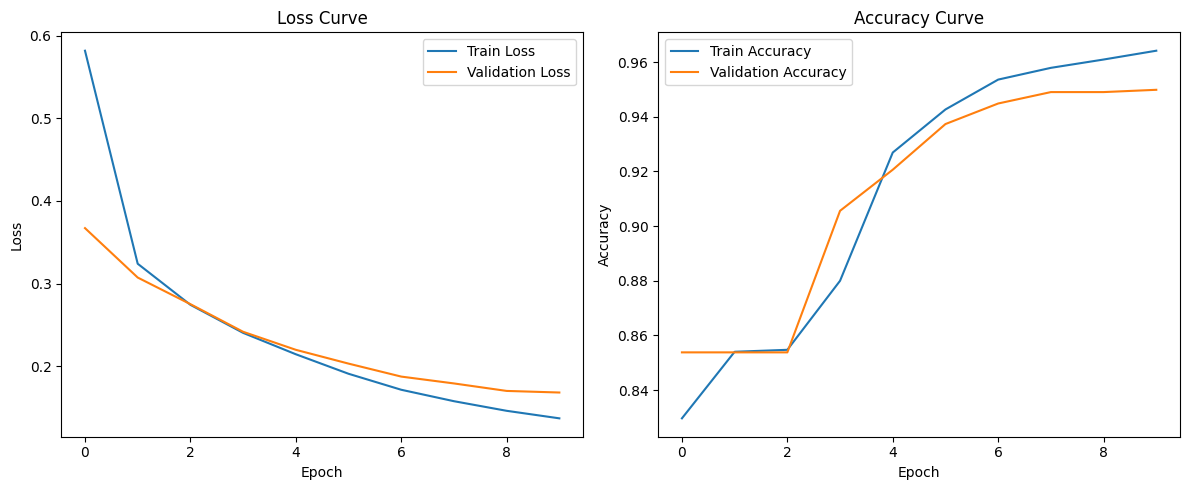

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')

plt.tight_layout()
plt.show()

In [ ]:
# Save the trained RoBERTa model and tokenizer
model.save_pretrained('./dep_roberta')
tokenizer.save_pretrained('./dep_roberta')

('./dep_roberta/tokenizer_config.json',
 './dep_roberta/special_tokens_map.json',
 './dep_roberta/vocab.json',
 './dep_roberta/merges.txt',
 './dep_roberta/added_tokens.json')

## Fine-Tuning the saved Models



In [ ]:
assigned_df.head

<bound method NDFrame.head of                                                     text  label  \
0      trouble sleeping, confused mind, restless hear...    1.0   
2      I've shifted my focus to something else but I'...    1.0   
4      every break, you must be nervous, like somethi...    1.0   
5      I feel scared, anxious, what can I do? And may...    1.0   
6        Have you ever felt nervous but didn't know why?    1.0   
...                                                  ...    ...   
12573  ugh doe anyone know what i can do to stop anxi...    0.0   
12580                               seekin for a new job    0.0   
12581  hour sleep in day and still working on my birt...    0.0   
12595    nz the place to be miss my own bed a bit though    0.0   
12596  just read r s amazing blog so tired don t want...    0.0   

                               Assigned Theme  
0      Relationships and Emotional Well-being  
2                   Post-Graduation Struggles  
4      Relationships and Emotional Well-being  
5      Relationships and Emotional Well-being  
6      Relationships and Emotional Well-being  
...                                       ...  
12573  Relationships and Emotional Well-being  
12580               Post-Graduation Struggles  
12581               Post-Graduation Struggles  
12595                   Transition and Change  
12596               Post-Graduation Struggles  

[4628 rows x 3 columns]>

In [ ]:
assigned_df['label'].value_counts()

label
1.0    3148
0.0    1480
Name: count, dtype: int64

In [ ]:
assigned_df.isnull().sum()

text              0
label             0
Assigned Theme    0
dtype: int64

In [ ]:
assigned_df.shape

(4628, 3)

In [ ]:
assigned_df['text'] = assigned_df['Assigned Theme'] + ' ' + assigned_df['text']

In [ ]:
assigned_df_n = assigned_df.sample(frac=1)
assigned_df_n.head()

text  label  \
5945  Post-Graduation Struggles i feel like all of t...    1.0   
9713  Social Issues misstoriblack cool i have no twe...    0.0   
9842  Post-Graduation Struggles so tired god i hate ...    0.0   
6449  Relationships and Emotional Well-being i feel ...    1.0   
5445  Relationships and Emotional Well-being wa doin...    1.0   

                              Assigned Theme  
5945               Post-Graduation Struggles  
9713                           Social Issues  
9842               Post-Graduation Struggles  
6449  Relationships and Emotional Well-being  
5445  Relationships and Emotional Well-being

In [ ]:
assigned_df_n['cleaned'] = assigned_df['text'].apply(text_transformation)

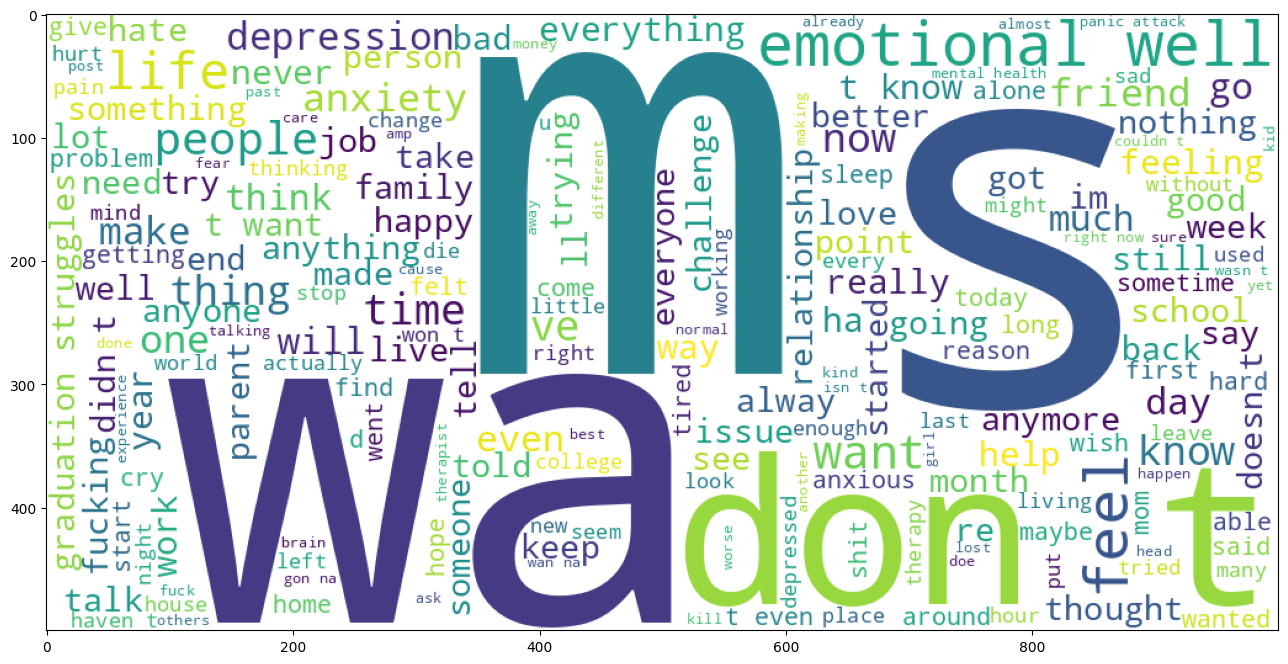

In [ ]:
from wordcloud import WordCloud
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in assigned_df_n['cleaned']:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 6).generate(word_cloud)
plt.imshow(wordcloud)

In [ ]:
%%time
max_words = 10000

from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = max_words, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n-',
                      split=' ', char_level=False, oov_token=None, document_count=0)

tokenizer.fit_on_texts(assigned_df_n['cleaned'])

CPU times: user 328 ms, sys: 0 ns, total: 328 ms
Wall time: 333 ms


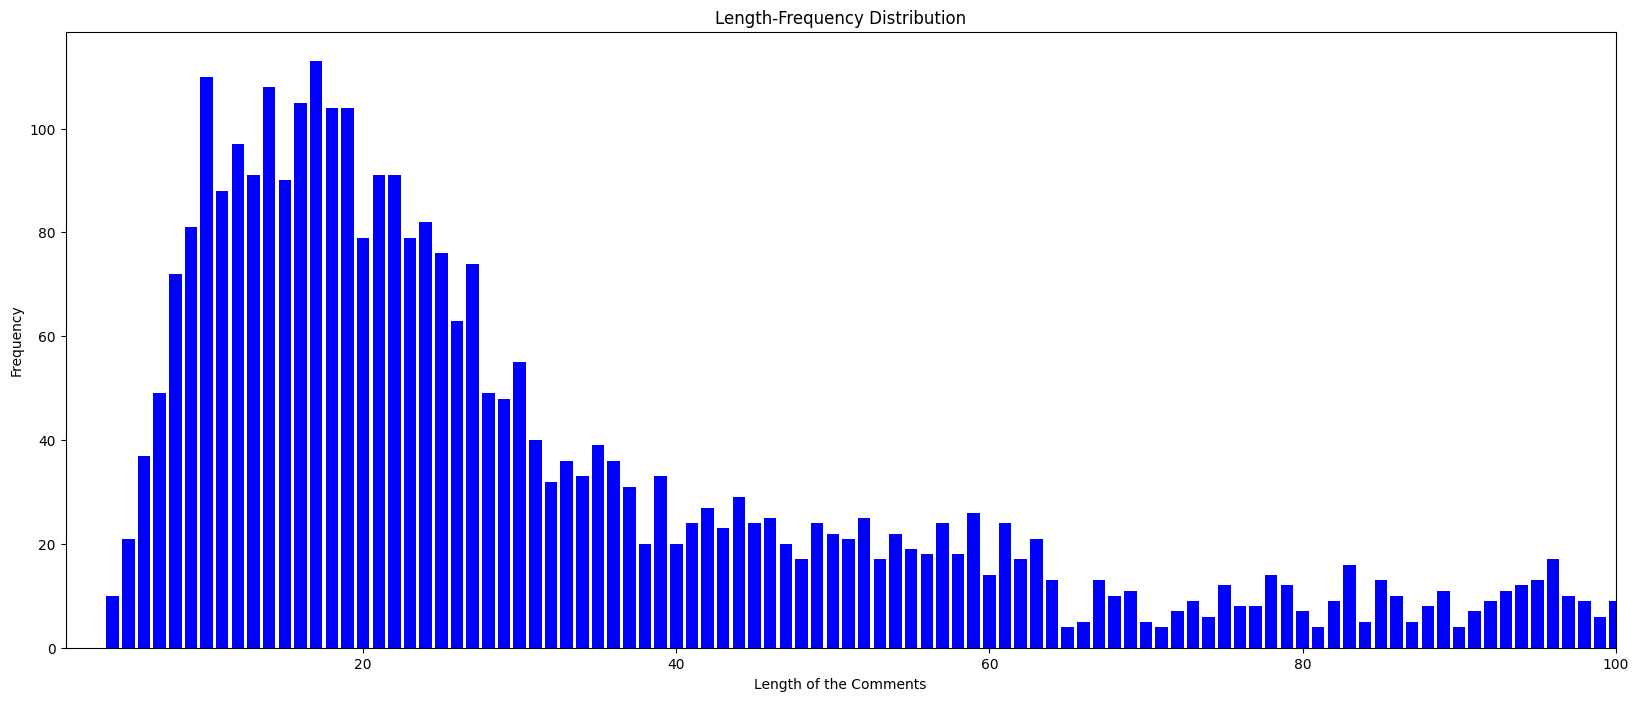

Maximum Length of a Comment: 4243
Minimum Length of a Comment: 4
Average Length of a Comment: 104.0


In [ ]:
assigned_df_n['Comment_Length'] = assigned_df_n.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in assigned_df_n.Comment_Length:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 100)
# in this notbook color is not working but it should work.
plt.xlabel('Length of the Comments')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()
print(f"Maximum Length of a Comment: {max(assigned_df_n.Comment_Length)}")
print(f"Minimum Length of a Comment: {min(assigned_df_n.Comment_Length)}")
print(f"Average Length of a Comment: {round(np.mean(assigned_df_n.Comment_Length),0)}")

In [ ]:
sequences = tokenizer.texts_to_sequences(assigned_df_n['cleaned'])

In [ ]:
# Check the DataFrame structure
print("Shape of assigned_df_n:", assigned_df_n.shape)
print("Columns in assigned_df_n:", assigned_df_n.columns)
print("First few rows of assigned_df_n:")
print(assigned_df_n.head())

# Check for the 'cleaned' column
if 'cleaned' in assigned_df_n.columns:
    if not assigned_df_n.empty:
        print("First cleaned value:", assigned_df_n['cleaned'].iloc[0])
    else:
        print("assigned_df_n is empty.")
else:
    print("'cleaned' column does not exist in assigned_df_n.")

# Check the sequences
print("Length of sequences:", len(sequences))
if len(sequences) > 0:
    print("First sequence:", sequences[0])
else:
    print("sequences is empty.")

# Tokenizer word index
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Shape of assigned_df_n: (4628, 5)
Columns in assigned_df_n: Index(['text', 'label', 'Assigned Theme', 'cleaned', 'Comment_Length'], dtype='object')
First few rows of assigned_df_n:
                                                   text  label  \
5945  Post-Graduation Struggles i feel like all of t...    1.0   
9713  Social Issues misstoriblack cool i have no twe...    0.0   
9842  Post-Graduation Struggles so tired god i hate ...    0.0   
6449  Relationships and Emotional Well-being i feel ...    1.0   
5445  Relationships and Emotional Well-being wa doin...    1.0   

                              Assigned Theme  \
5945               Post-Graduation Struggles   
9713                           Social Issues   
9842               Post-Graduation Struggles   
6449  Relationships and Emotional Well-being   
5445  Relationships and Emotional Well-being   

                                                cleaned  Comment_Length  
5945  post graduation struggles i feel like all of t...    

In [ ]:
%%time
## Before padding length of different training examples
mx = len(sequences[0])
for x in sequences:
  mx =max(mx, len(x))
print("Maximum Review length",mx)

##We can also determine maxlen by plotting the frequency distribution of the lengths
corpus = keras.preprocessing.sequence.pad_sequences(sequences, value=0.0, padding='post', maxlen= 60)
## We get the maxlen value from the Length frequency distribution

print(corpus[1])

Maximum Review length 4243
[ 105  153 6933  955    1   17   59 1231 1473   16    6 6934    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0]
CPU times: user 30.6 ms, sys: 52 µs, total: 30.6 ms
Wall time: 40.5 ms


In [ ]:
# Ensure the index is reset to default for unassigned_df_n
assigned_df_n = assigned_df_n.reset_index(drop=True)

# Loop through the first two rows
for i in range(2):
    # Access the 'cleaned' column (ensure index is reset)
    print(assigned_df_n['cleaned'][i])

    # Access 'corpus' correctly based on its type
    if isinstance(corpus, pd.DataFrame):
        print("\n", corpus.iloc[i])  # Use .iloc for DataFrame positional indexing
    else:
        print("\n", corpus[i])  # For Numpy arrays

post graduation struggles i feel like all of this is part of a bigger plan not that i believe in god or anything i believe that what we are experiencing right this moment is reliving our past we are living a fulfilling life there somewhere in the future i m not sure what the endgame is but being curious about it it s the only thing preventing me from burying myself six foot under i d like to find out if my older self is alive and well i feel him watching me from the distance

 [ 242   77   69  224    4 4301   41   76  906   13    5  379    1   12
   30  239   46    5 6932   15   14   22 1472   39    7    7   21    5
   92   66 2768   10   64 5185   55 1678 1625  796    1  228   24    3
  199   51   45    6  734  253   15  433    2   26    1   27  155  854
   10   64    5 1284]
social issues misstoriblack cool i have no tweet apps for my razr

 [ 105  153 6933  955    1   17   59 1231 1473   16    6 6934    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
  

# fine-tuning dep Roberta

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import RobertaTokenizer, RobertaForSequenceClassification, AdamW, get_linear_schedule_with_warmup
import torch
import torch.nn.functional as F
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

corpus = assigned_df_n['text'].values
labels = assigned_df_n['label'].values

X_train, X_rem, y_train, y_rem = train_test_split(corpus, labels, test_size=0.3, random_state=0, stratify=labels) #Stratified split
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=0, stratify=y_rem) #Further split into val and test

print("Training Size: ", len(X_train))
print("Validation Size: ", len(X_val))
print("Test Size: ", len(X_test))
print("Class distribution in training set:", pd.Series(y_train).value_counts())


tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

def tokenize_function(texts):
    return tokenizer(texts, padding='max_length', truncation=True, max_length=128, return_tensors='pt')

train_encodings = tokenize_function(X_train.tolist())
val_encodings = tokenize_function(X_val.tolist())
test_encodings = tokenize_function(X_test.tolist())

y_train_long = torch.tensor(y_train, dtype=torch.long)
y_val_long = torch.tensor(y_val, dtype=torch.long)
y_test_long = torch.tensor(y_test, dtype=torch.long)

y_train_one_hot = F.one_hot(y_train_long, num_classes=2).float()
y_val_one_hot = F.one_hot(y_val_long, num_classes=2).float()
y_test_one_hot = F.one_hot(y_test_long, num_classes=2).float()

Training Size:  3239
Validation Size:  694
Test Size:  695
Class distribution in training set: 1.0    2203
0.0    1036
Name: count, dtype: int64


In [ ]:
class DepressionDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.float32)
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = DepressionDataset(train_encodings, y_train_one_hot)
val_dataset = DepressionDataset(val_encodings, y_val_one_hot)
test_dataset = DepressionDataset(test_encodings, y_test_one_hot)

#Check lengths
print(f"Length of train_encodings['input_ids']: {len(train_dataset)}")
print(f"Length of y_train_one_hot: {len(y_train_one_hot)}")
print(f"Length of val_encodings['input_ids']: {len(val_dataset)}")
print(f"Length of y_val_one_hot: {len(y_val_one_hot)}")
print(f"Length of test_encodings['input_ids']: {len(test_dataset)}")
print(f"Length of y_test_one_hot: {len(y_test_one_hot)}")

Length of train_encodings['input_ids']: 3239
Length of y_train_one_hot: 3239
Length of val_encodings['input_ids']: 694
Length of y_val_one_hot: 694
Length of test_encodings['input_ids']: 695
Length of y_test_one_hot: 695


In [ ]:
model = RobertaForSequenceClassification.from_pretrained('dep_roberta', num_labels=2)
batch_size = 32
epochs = 10  # Increased epochs for better training
learning_rate = 1e-6  # Adjusted learning rate

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

optimizer = AdamW(model.parameters(), lr=learning_rate)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(train_loader) * epochs)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
best_val_loss = float('inf')
patience = 3
epochs_no_improve = 0

for epoch in range(epochs):
    model.train()
    train_loss = 0
    train_preds = []
    train_labels = []

    for batch in train_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        scheduler.step()

        train_loss += loss.item()
        logits = outputs.logits
        _, predicted = torch.max(logits, 1)
        train_preds.extend(predicted.cpu().numpy())
        train_labels.extend(torch.argmax(labels, dim=1).cpu().numpy())

    train_loss /= len(train_loader)
    train_accuracy = accuracy_score(train_labels, train_preds)

    model.eval()
    val_loss = 0
    val_preds = []
    val_labels = []
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            val_loss += loss.item()
            logits = outputs.logits
            _, predicted = torch.max(logits, 1)
            val_preds.extend(predicted.cpu().numpy())
            val_labels.extend(torch.argmax(labels, dim=1).cpu().numpy())

    val_loss /= len(val_loader)
    val_accuracy = accuracy_score(val_labels, val_preds)

    print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_no_improve = 0
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print("Early stopping triggered!")
            break

<ipython-input-115-e4bf3ede6f43>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-115-e4bf3ede6f43>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx], dtype=torch.float32)
<ipython-input-115-e4bf3ede6f43>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-115-e4bf3ede6f43>:8: UserWarning: To copy construct from a ten

Epoch 1/10, Train Loss: 0.2188, Train Acc: 0.9383, Val Loss: 0.1444, Val Acc: 0.9582


<ipython-input-115-e4bf3ede6f43>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-115-e4bf3ede6f43>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx], dtype=torch.float32)
<ipython-input-115-e4bf3ede6f43>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-115-e4bf3ede6f43>:8: UserWarning: To copy construct from a ten

Epoch 2/10, Train Loss: 0.1470, Train Acc: 0.9515, Val Loss: 0.1218, Val Acc: 0.9625


<ipython-input-115-e4bf3ede6f43>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-115-e4bf3ede6f43>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx], dtype=torch.float32)
<ipython-input-115-e4bf3ede6f43>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-115-e4bf3ede6f43>:8: UserWarning: To copy construct from a ten

Epoch 3/10, Train Loss: 0.1141, Train Acc: 0.9636, Val Loss: 0.1141, Val Acc: 0.9625


<ipython-input-115-e4bf3ede6f43>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-115-e4bf3ede6f43>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx], dtype=torch.float32)
<ipython-input-115-e4bf3ede6f43>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-115-e4bf3ede6f43>:8: UserWarning: To copy construct from a ten

Epoch 4/10, Train Loss: 0.0992, Train Acc: 0.9704, Val Loss: 0.1136, Val Acc: 0.9625


<ipython-input-115-e4bf3ede6f43>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-115-e4bf3ede6f43>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx], dtype=torch.float32)
<ipython-input-115-e4bf3ede6f43>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-115-e4bf3ede6f43>:8: UserWarning: To copy construct from a ten

Epoch 5/10, Train Loss: 0.0877, Train Acc: 0.9741, Val Loss: 0.1088, Val Acc: 0.9654


<ipython-input-115-e4bf3ede6f43>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-115-e4bf3ede6f43>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx], dtype=torch.float32)
<ipython-input-115-e4bf3ede6f43>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-115-e4bf3ede6f43>:8: UserWarning: To copy construct from a ten

Epoch 6/10, Train Loss: 0.0845, Train Acc: 0.9741, Val Loss: 0.1055, Val Acc: 0.9669


<ipython-input-115-e4bf3ede6f43>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-115-e4bf3ede6f43>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx], dtype=torch.float32)
<ipython-input-115-e4bf3ede6f43>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-115-e4bf3ede6f43>:8: UserWarning: To copy construct from a ten

Epoch 7/10, Train Loss: 0.0719, Train Acc: 0.9805, Val Loss: 0.1101, Val Acc: 0.9640


<ipython-input-115-e4bf3ede6f43>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-115-e4bf3ede6f43>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx], dtype=torch.float32)
<ipython-input-115-e4bf3ede6f43>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-115-e4bf3ede6f43>:8: UserWarning: To copy construct from a ten

Epoch 8/10, Train Loss: 0.0744, Train Acc: 0.9768, Val Loss: 0.1051, Val Acc: 0.9683


<ipython-input-115-e4bf3ede6f43>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-115-e4bf3ede6f43>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx], dtype=torch.float32)
<ipython-input-115-e4bf3ede6f43>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-115-e4bf3ede6f43>:8: UserWarning: To copy construct from a ten

Epoch 9/10, Train Loss: 0.0725, Train Acc: 0.9781, Val Loss: 0.1049, Val Acc: 0.9683


<ipython-input-115-e4bf3ede6f43>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-115-e4bf3ede6f43>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx], dtype=torch.float32)
<ipython-input-115-e4bf3ede6f43>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-115-e4bf3ede6f43>:8: UserWarning: To copy construct from a ten

Epoch 10/10, Train Loss: 0.0651, Train Acc: 0.9815, Val Loss: 0.1051, Val Acc: 0.9683


In [ ]:
model.load_state_dict(torch.load('best_model.pth'))
model.eval()
test_loss = 0
test_preds = []
test_labels = []
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        test_loss += loss.item()
        logits = outputs.logits
        _, predicted = torch.max(logits, 1)
        test_preds.extend(predicted.cpu().numpy())
        test_labels.extend(torch.argmax(labels, dim=1).cpu().numpy())

test_loss /= len(test_loader)
test_accuracy = accuracy_score(test_labels, test_preds)
precision, recall, f1, _ = precision_recall_fscore_support(test_labels, test_preds, average='weighted', zero_division=1)

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

<ipython-input-118-faf5f14ba5d6>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))
<ipython-input-115-e4bf3ede6f43>:7: Use

Test Loss: 0.1137, Test Accuracy: 0.9683
Precision: 0.9683, Recall: 0.9683, F1-score: 0.9683


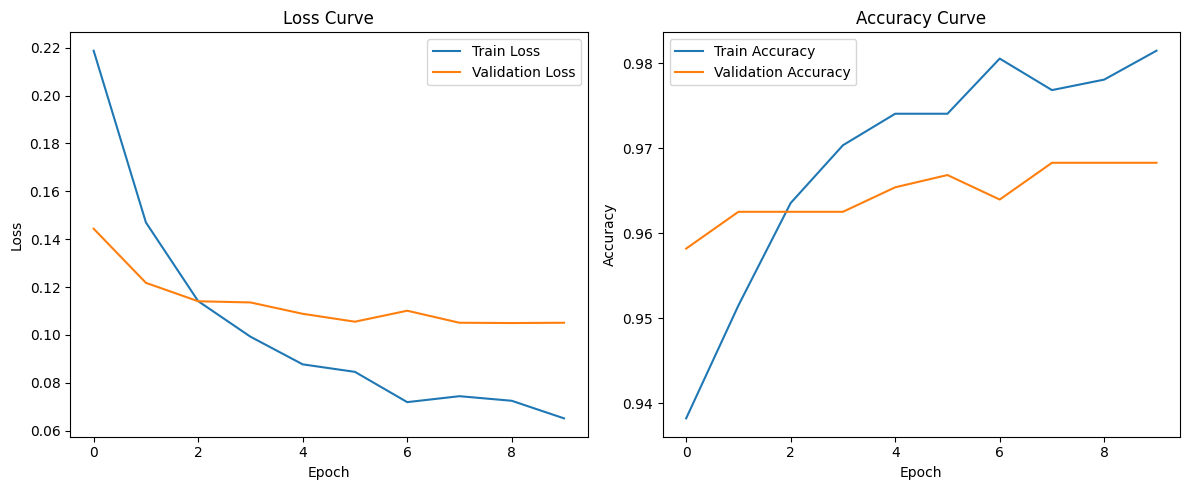

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')

plt.tight_layout()
plt.show()

In [ ]:
# Save the trained RoBERTa model and tokenizer
model.save_pretrained('./student_dep_roberta')
tokenizer.save_pretrained('./student_dep_roberta')

('./student_dep_roberta/tokenizer_config.json',
 './student_dep_roberta/special_tokens_map.json',
 './student_dep_roberta/vocab.json',
 './student_dep_roberta/merges.txt',
 './student_dep_roberta/added_tokens.json')

# Fine-tuning dep distilbert

In [ ]:
# Load dataset from a DataFrame
corpus = assigned_df_n['text'].values  # Array of text data
labels = assigned_df_n['label'].values  # Array of labels (0 or 1)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(corpus, labels, test_size=0.2, random_state=0)

print("Training Size: ", len(X_train))
print("Test Size: ", len(X_test))
print("Class distribution in training set:", pd.Series(y_train).value_counts())

Training Size:  3702
Test Size:  926
Class distribution in training set: 1.0    2525
0.0    1177
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Handle class imbalance using RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train.reshape(-1, 1), y_train)

# Flatten the text data back to 1D array
X_train_resampled = X_train_resampled.ravel()

print("Class distribution after oversampling:", pd.Series(y_train_resampled).value_counts())

Class distribution after oversampling: 1.0    2525
0.0    2525
Name: count, dtype: int64


In [ ]:
# Load the tokenizer from the saved directory
tokenizer = DistilBertTokenizer.from_pretrained('./dep_distilbert')

# Tokenization function
def tokenize_function(texts):
    return tokenizer(list(texts), padding='max_length', truncation=True, max_length=128, return_tensors="pt")

# Tokenize the resampled training data and test data
train_encodings = tokenize_function(X_train_resampled)
test_encodings = tokenize_function(X_test)

In [ ]:
# Convert labels to tensors and one-hot encode
num_labels = 2  # Binary classification
y_train_resampled = torch.tensor(y_train_resampled).long()
y_test = torch.tensor(y_test).long()

# One-hot encoding
y_train_one_hot = F.one_hot(y_train_resampled, num_classes=num_labels).float()
y_test_one_hot = F.one_hot(y_test, num_classes=num_labels).float()

print("Shape of y_train_one_hot:", y_train_one_hot.shape)
print("Shape of y_test_one_hot:", y_test_one_hot.shape)

Shape of y_train_one_hot: torch.Size([5050, 2])
Shape of y_test_one_hot: torch.Size([926, 2])


In [ ]:
class DepressionDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

# Create PyTorch datasets
train_dataset = DepressionDataset(train_encodings, y_train_one_hot)
test_dataset = DepressionDataset(test_encodings, y_test_one_hot)

# Verify dataset sizes
print("Train dataset size:", len(train_dataset))
print("Test dataset size:", len(test_dataset))

Train dataset size: 5050
Test dataset size: 926


In [ ]:
model = DistilBertForSequenceClassification.from_pretrained('dep_distilbert', num_labels=2)

In [ ]:
!pip install textaugment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.8 MB/s eta 0:00:00


In [ ]:
from torch.optim import AdamW
from torch.cuda.amp import GradScaler, autocast
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
from tqdm import tqdm
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_recall_curve
)
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Check if GPU is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Assuming model and tokenizer are already loaded
model = model.to(device)  # Ensure model is on the correct device

# Training parameters
batch_size = 16
epochs = 10
learning_rate = 1e-6  # Decrease learning rate
accumulation_steps = 4
patience = 3
weight_decay = 0.1  # Increase weight decay
max_grad_norm = 1.0
scaler = GradScaler()

# TensorBoard logger
writer = SummaryWriter()

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Compute class weights for imbalanced datasets
labels = np.concatenate([batch['labels'].cpu().numpy().flatten() for batch in train_loader])
class_weights = compute_class_weight('balanced', classes=np.unique(labels), y=labels)
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

# Define loss function with class weights
loss_fn = torch.nn.CrossEntropyLoss(weight=class_weights)

# Optimizer with weight decay
optimizer = AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.2, patience=2, verbose=True)

# Early stopping variables
train_losses = []
val_losses = []
best_val_loss = np.inf  # Track the best validation loss
early_stopping_counter = 0

# Freeze some layers for initial training
for param in model.base_model.parameters():
    param.requires_grad = False  # Freeze all layers

# Training loop
progress_bar = tqdm(range(epochs * len(train_loader)))
model.train()

for epoch in range(epochs):
    print(f"\nEpoch {epoch + 1}/{epochs}")
    epoch_train_loss = 0
    epoch_train_preds = []
    epoch_train_labels = []

    for step, batch in enumerate(train_loader):
        batch = {key: val.to(device) for key, val in batch.items()}

        with autocast():
            outputs = model(**batch)
            loss = outputs.loss

        scaler.scale(loss).backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)

        if (step + 1) % accumulation_steps == 0:
            scaler.step(optimizer)
            scaler.update()
            optimizer.zero_grad()

        progress_bar.update(1)
        epoch_train_loss += loss.item()

        logits = outputs.logits
        predictions = torch.argmax(logits, dim=-1)
        epoch_train_labels.extend(torch.argmax(batch['labels'], dim=-1).cpu().numpy())
        epoch_train_preds.extend(predictions.cpu().numpy())

    avg_train_loss = epoch_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    train_accuracy = accuracy_score(epoch_train_labels, epoch_train_preds)
    train_f1 = f1_score(epoch_train_labels, epoch_train_preds, average='weighted')

    writer.add_scalar("Loss/train", avg_train_loss, epoch)
    writer.add_scalar("Accuracy/train", train_accuracy, epoch)
    writer.add_scalar("F1/train", train_f1, epoch)

    print(f"  Training Loss: {avg_train_loss:.4f}")
    print(f"  Training F1-Score: {train_f1:.4f}")

    # Validation loop
    model.eval()
    epoch_val_loss = 0
    epoch_val_preds = []
    epoch_val_labels = []

    with torch.no_grad():
        for batch in test_loader:
            batch = {key: val.to(device) for key, val in batch.items()}

            with autocast():
                outputs = model(**batch)
                loss = outputs.loss

            logits = outputs.logits
            predictions = torch.argmax(logits, dim=-1)
            epoch_val_labels.extend(torch.argmax(batch['labels'], dim=-1).cpu().numpy())
            epoch_val_preds.extend(predictions.cpu().numpy())
            epoch_val_loss += loss.item()

    avg_val_loss = epoch_val_loss / len(test_loader)
    val_losses.append(avg_val_loss)

    val_accuracy = accuracy_score(epoch_val_labels, epoch_val_preds)
    val_f1 = f1_score(epoch_val_labels, epoch_val_preds, average='weighted')

    writer.add_scalar("Loss/val", avg_val_loss, epoch)
    writer.add_scalar("Accuracy/val", val_accuracy, epoch)
    writer.add_scalar("F1/val", val_f1, epoch)

    print(f"  Validation Loss: {avg_val_loss:.4f}")
    print(f"  Validation F1-Score: {val_f1:.4f}")

    # Early stopping check based on validation loss
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), "best_model.pt")
        early_stopping_counter = 0
    else:
        early_stopping_counter += 1
        print(f"  Early stopping counter: {early_stopping_counter}/{patience}")
        if early_stopping_counter >= patience:
            print("Early stopping triggered.")
            break

    # Update the learning rate based on validation loss
    lr_scheduler.step(avg_val_loss)

# Evaluate on the test set
model.eval()
all_predictions = []
all_labels = []

with torch.no_grad():
    for batch in test_loader:
        batch = {key: val.to(device) for key, val in batch.items()}
        outputs = model(**batch)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=-1)
        all_predictions.extend(predictions.cpu().numpy())
        all_labels.extend(torch.argmax(batch['labels'], dim=-1).cpu().numpy())

test_accuracy = accuracy_score(all_labels, all_predictions)
test_f1 = f1_score(all_labels, all_predictions, average='weighted')

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test F1-Score: {test_f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(all_labels, all_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Precision-Recall Curve
with torch.no_grad():
    all_probs = []
    for batch in test_loader:
        batch = {key: val.to(device) for key, val in batch.items()}
        outputs = model(**batch)
        probs = torch.softmax(outputs.logits, dim=-1)
        all_probs.extend(probs.cpu().numpy())

all_probs = np.array(all_probs)
precision, recall, _ = precision_recall_curve(all_labels, all_probs[:, 1])

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Learning Curve
plt.figure(figsize=(8, 6))
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

# Close the TensorBoard writer
writer.close()

<ipython-input-129-1ea598c2f1ac>:33: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
  0%|          | 0/3160 [00:00<?, ?it/s]<ipython-input-129-1ea598c2f1ac>:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
  0%|          | 5/3160 [00:00<01:06, 47.65it/s]


Epoch 1/10


 10%|█         | 316/3160 [00:05<00:45, 62.02it/s]<ipython-input-129-1ea598c2f1ac>:122: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


  Training Loss: 0.2779
  Training F1-Score: 0.9066
  Validation Loss: 0.1954
  Validation F1-Score: 0.9359


<ipython-input-129-1ea598c2f1ac>:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
 10%|█         | 323/3160 [00:06<03:47, 12.50it/s]


Epoch 2/10


 20%|█▉        | 631/3160 [00:11<00:39, 63.67it/s]<ipython-input-129-1ea598c2f1ac>:122: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


  Training Loss: 0.2913
  Training F1-Score: 0.9059
  Validation Loss: 0.1909
  Validation F1-Score: 0.9382


<ipython-input-129-1ea598c2f1ac>:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
 20%|██        | 644/3160 [00:13<02:38, 15.88it/s]


Epoch 3/10


 30%|██▉       | 944/3160 [00:18<00:35, 61.59it/s]<ipython-input-129-1ea598c2f1ac>:122: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


  Training Loss: 0.2839
  Training F1-Score: 0.9087
  Validation Loss: 0.1868
  Validation F1-Score: 0.9393


<ipython-input-129-1ea598c2f1ac>:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
 30%|███       | 958/3160 [00:19<02:15, 16.22it/s]


Epoch 4/10


 40%|███▉      | 1258/3160 [00:24<00:30, 62.28it/s]<ipython-input-129-1ea598c2f1ac>:122: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


  Training Loss: 0.2766
  Training F1-Score: 0.9104
  Validation Loss: 0.1823
  Validation F1-Score: 0.9405


<ipython-input-129-1ea598c2f1ac>:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
 40%|████      | 1272/3160 [00:26<01:57, 16.07it/s]


Epoch 5/10


 50%|████▉     | 1579/3160 [00:31<00:25, 61.84it/s]<ipython-input-129-1ea598c2f1ac>:122: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


  Training Loss: 0.2696
  Training F1-Score: 0.9116
  Validation Loss: 0.1785
  Validation F1-Score: 0.9427


<ipython-input-129-1ea598c2f1ac>:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
 50%|█████     | 1592/3160 [00:33<01:49, 14.35it/s]


Epoch 6/10


 60%|█████▉    | 1891/3160 [00:38<00:20, 62.09it/s]<ipython-input-129-1ea598c2f1ac>:122: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


  Training Loss: 0.2616
  Training F1-Score: 0.9126
  Validation Loss: 0.1746
  Validation F1-Score: 0.9461


<ipython-input-129-1ea598c2f1ac>:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
 60%|██████    | 1905/3160 [00:40<01:16, 16.36it/s]


Epoch 7/10


 70%|██████▉   | 2211/3160 [00:45<00:15, 61.87it/s]<ipython-input-129-1ea598c2f1ac>:122: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


  Training Loss: 0.2553
  Training F1-Score: 0.9136
  Validation Loss: 0.1714
  Validation F1-Score: 0.9451
